In [4]:
import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt
 

import acquire as a
import prepare as p
import wrangle as w
import explore as exp

# Acquire

In [5]:
def read_csv_file():
    df = pd.read_csv('combined_wine_data.csv')
    return df

df = read_csv_file()
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
0      8.8        6  White      1  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
4      9.9        6  White      1

# Prepare

- fixed_acidity  
    - Corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.
        - Units of measure: pH scale 0-14
- volatile_acidity	
    - Corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.
        - Units of measure: 0.xx g/100mL
- citric_acid
    - 'Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability'.
        - Units of measure: 0.xx g/L
- residual_sugar
    - Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.
        - Units of measure: Grams
- chlorides	
    - In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride5. Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall taste and quality of the wine.
        - Units of measure: Percentage of volume
- free_sulfur_dioxide
    - Sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. 
        - Units of measure: mg/L
- total_sulfur_dioxide	
    - The portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
        - Units of measure: mg/L
- density	
    - Is the mass per unit volume of wine or must at 20°C. 
        - Units of measure: g/mL, and denoted by the symbol $p$ 20°C.
- ph
    - Typically, the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.
        - Units of measure: pH scale 0-14
- sulphates	(sulphite)
    - Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. While they're found in many foods and beverages, they're particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache.
        - Units of measure: mg/L
- alcohol	
    - The alcohol content by percent in wine
        - Units of measure: ABV(alcohol percentage by volume)
- quality	
    - The quality rating of the wine 1-10
        - Units of measure: Scale 1-10, 1 being the worst, and 10 is best
- Type
    - Whether the wine is red or white

In [6]:
#check shape
df.shape

(6497, 14)

#### Summarize the DataFrame

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  Whit

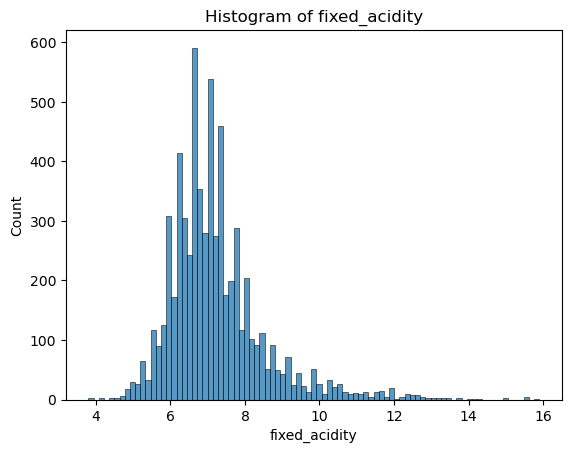

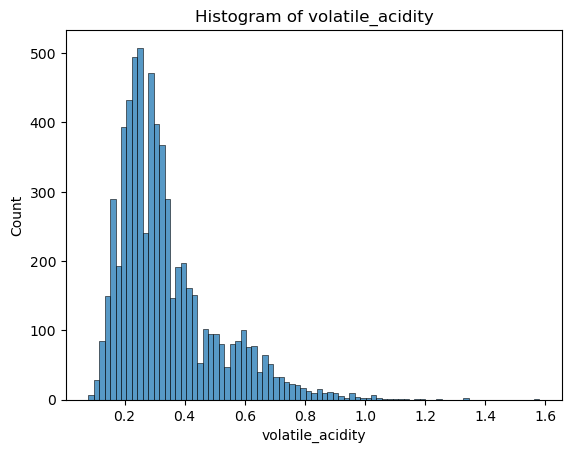

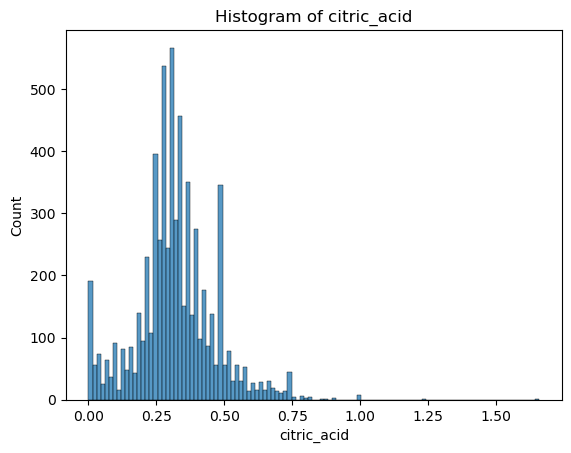

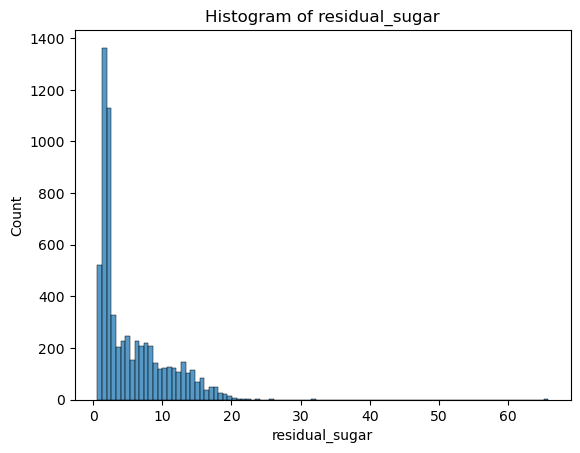

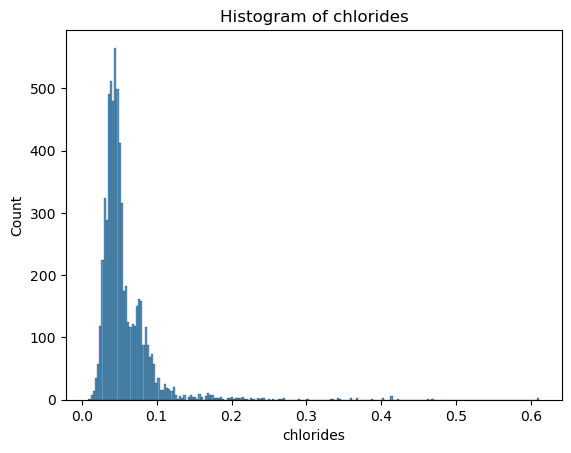

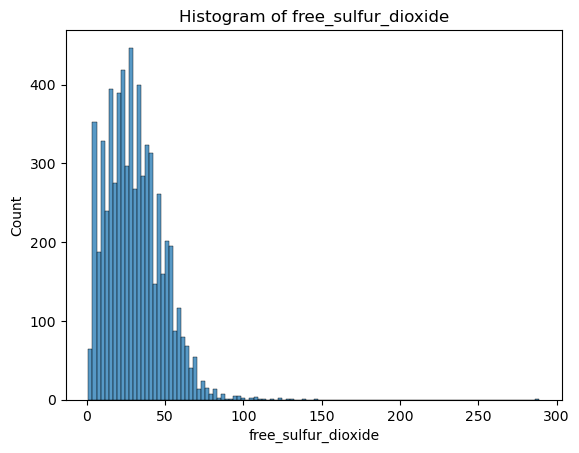

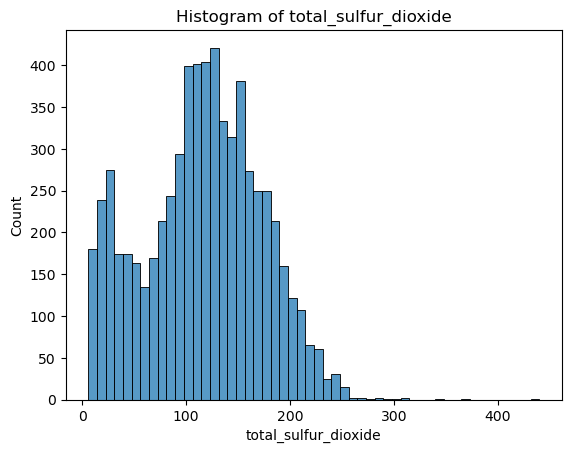

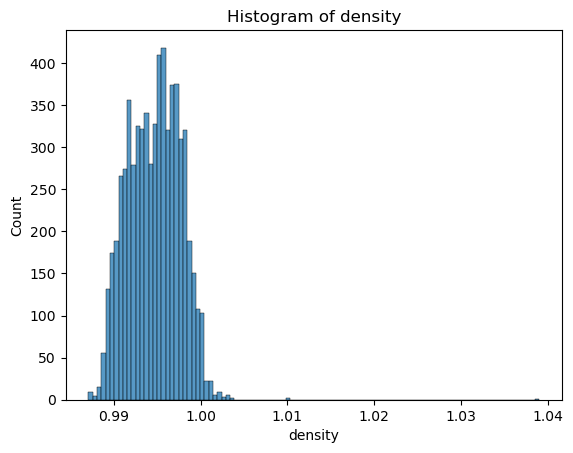

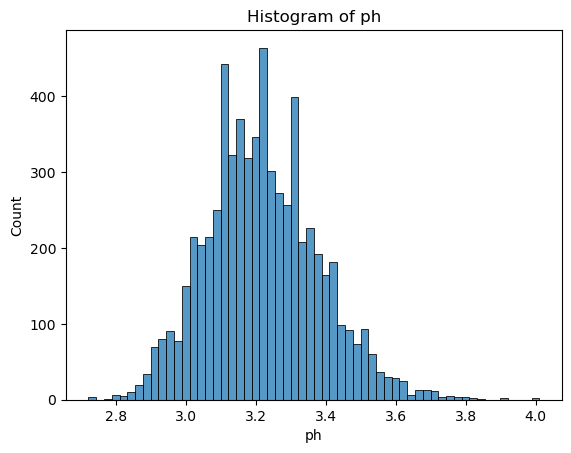

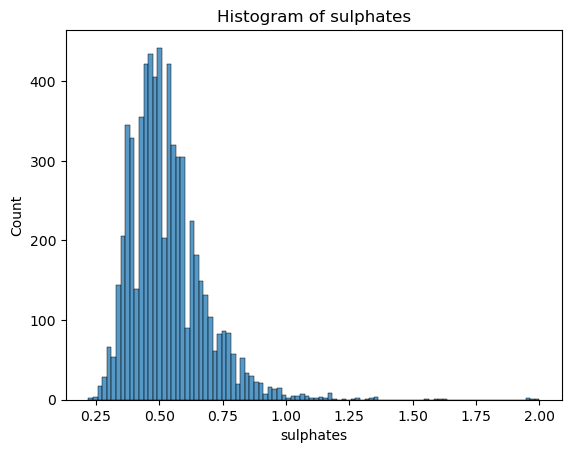

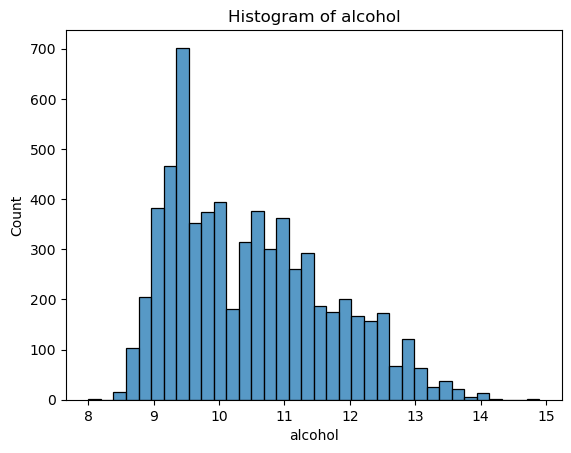

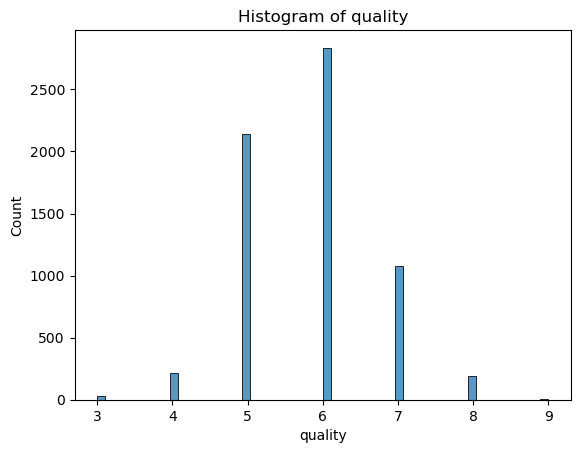

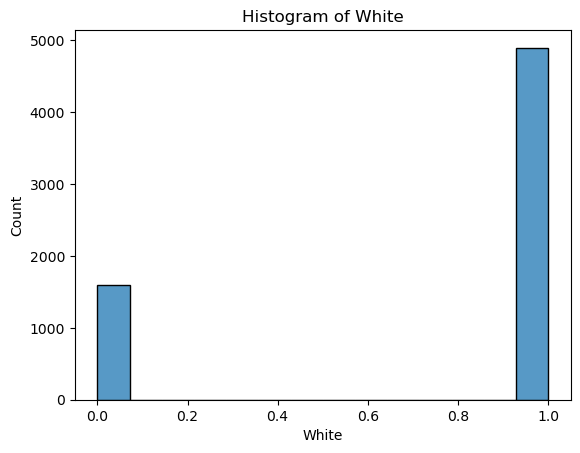

In [7]:
# use summarize function
p.summarize(df)

##### Takeaways:
- There are no null values in rows
- There are no null value in columns
- The data types make sense for what they are

In [8]:
# check it out
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
0      8.8        6  White      1  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
4      9.9        6  White      1

In [9]:
# explore prior to outlier removal, I don't want to remove any outliers from this category
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

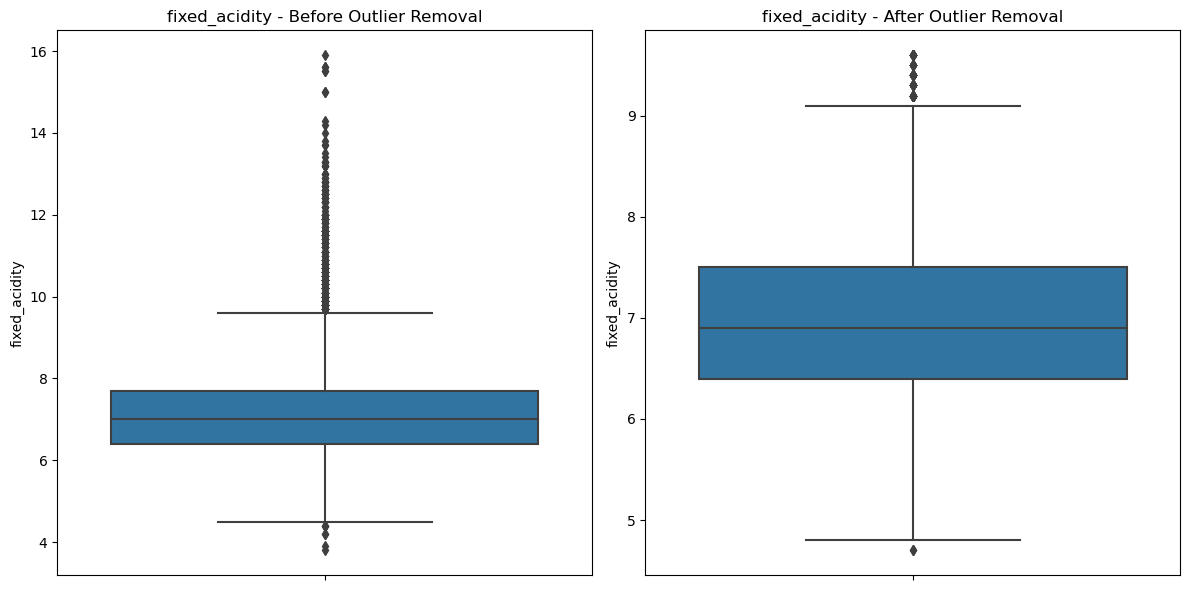

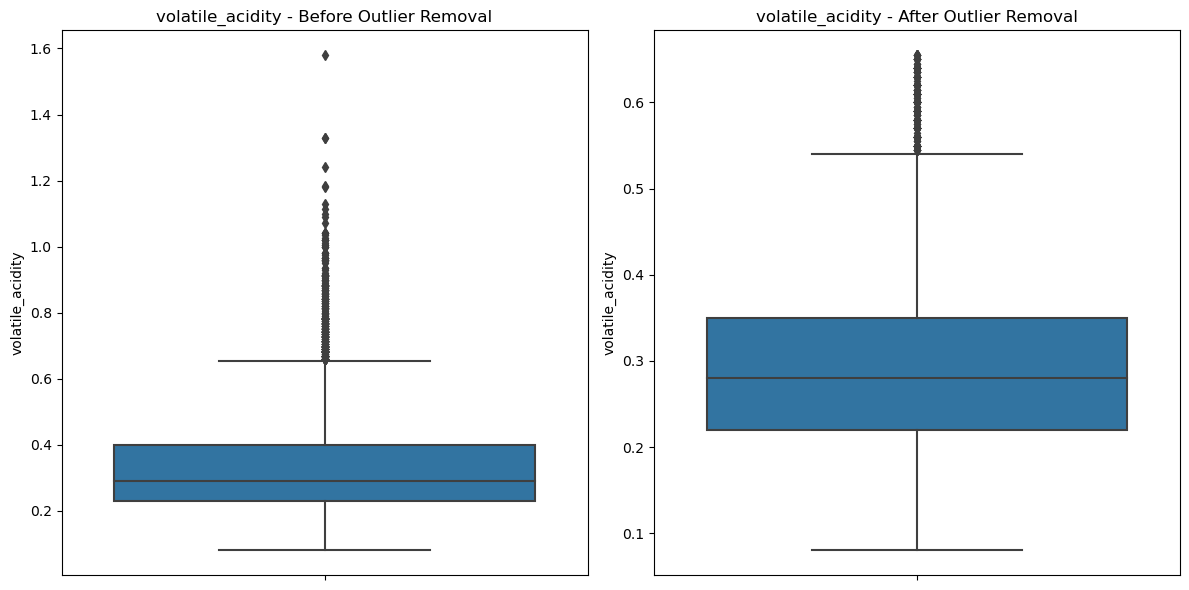

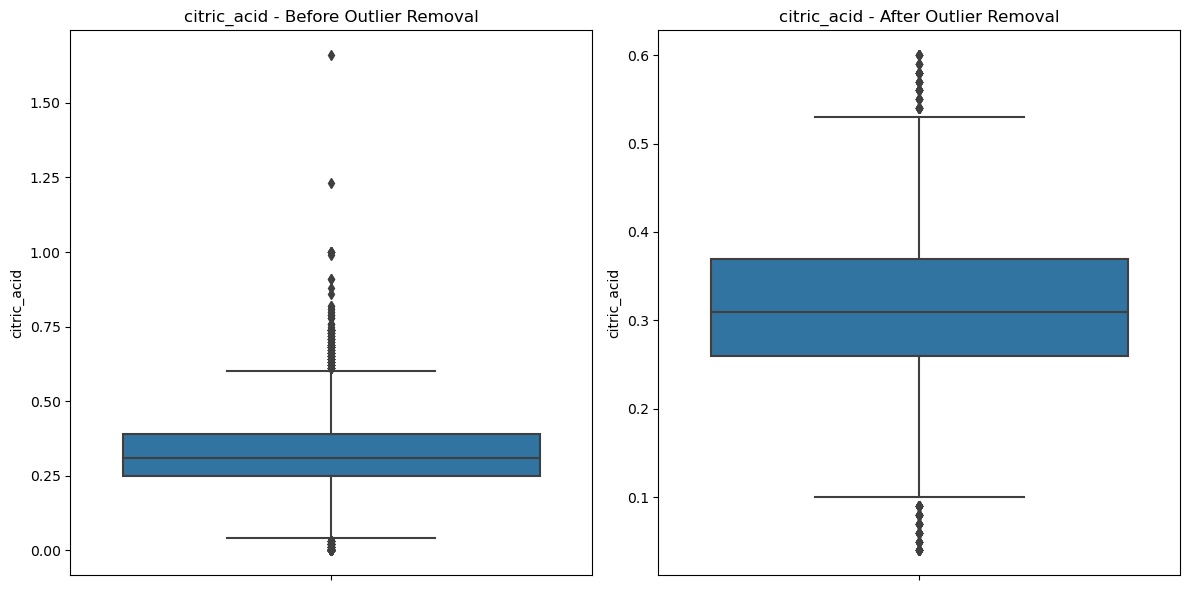

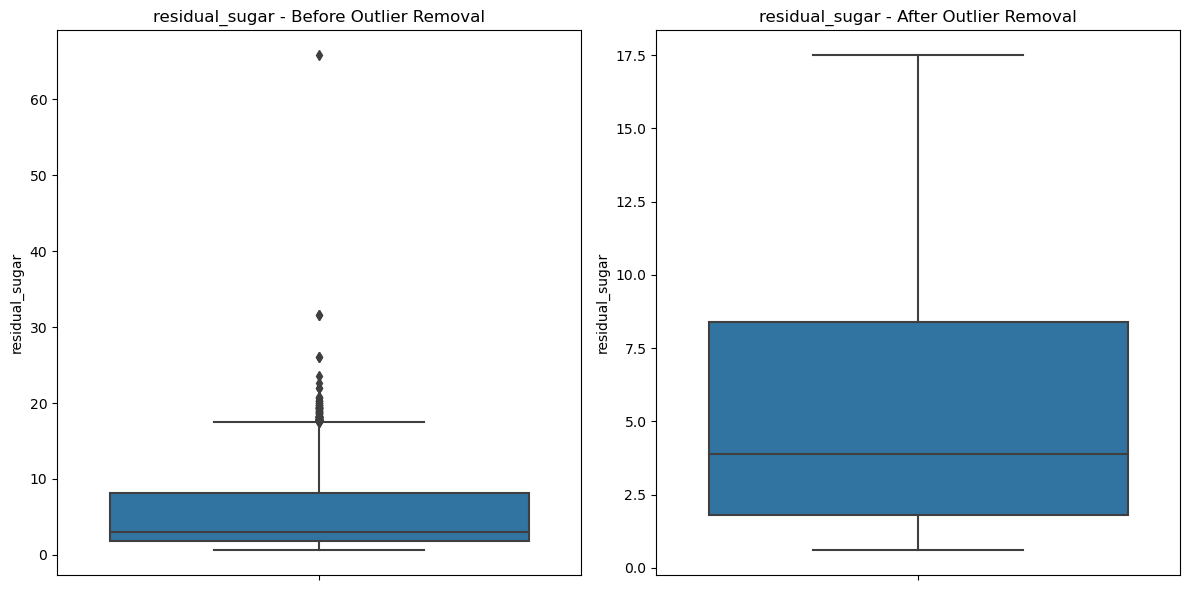

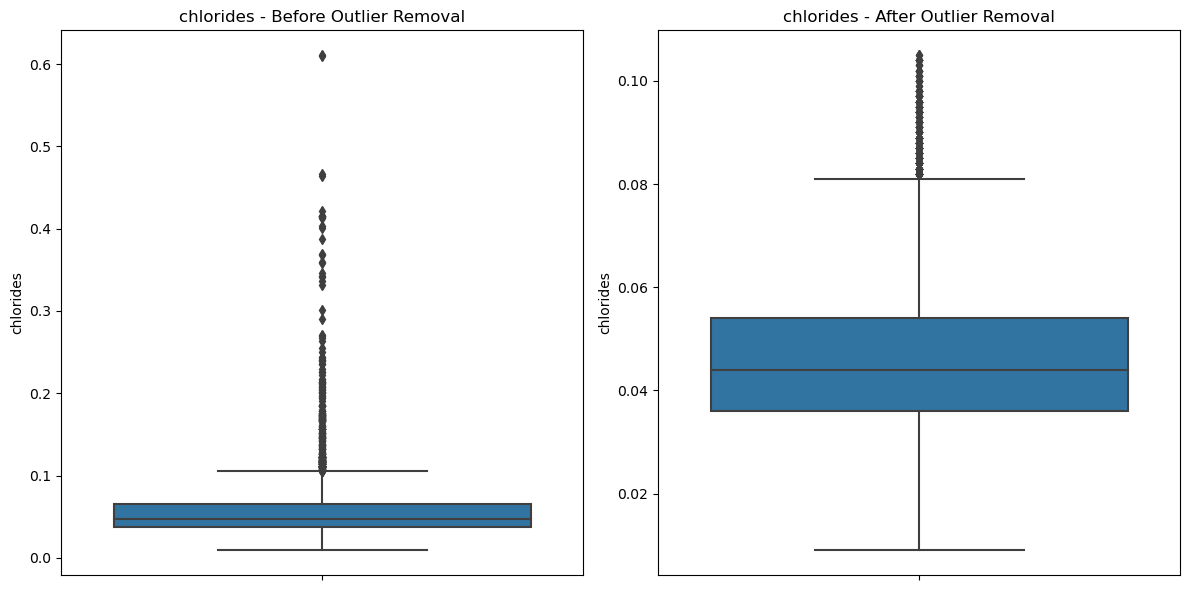

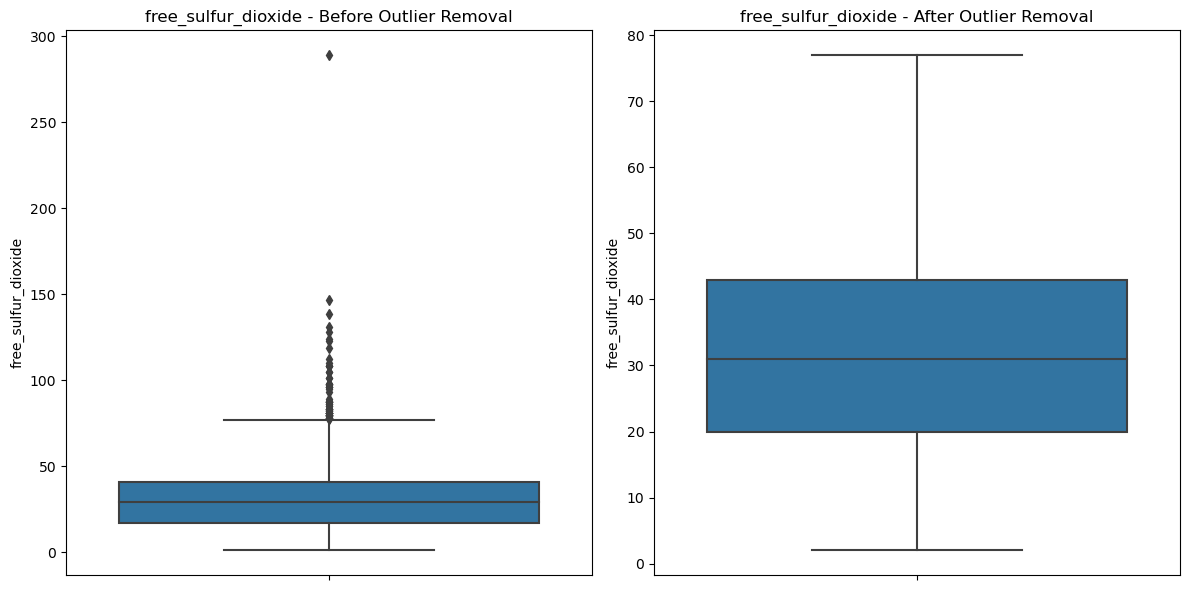

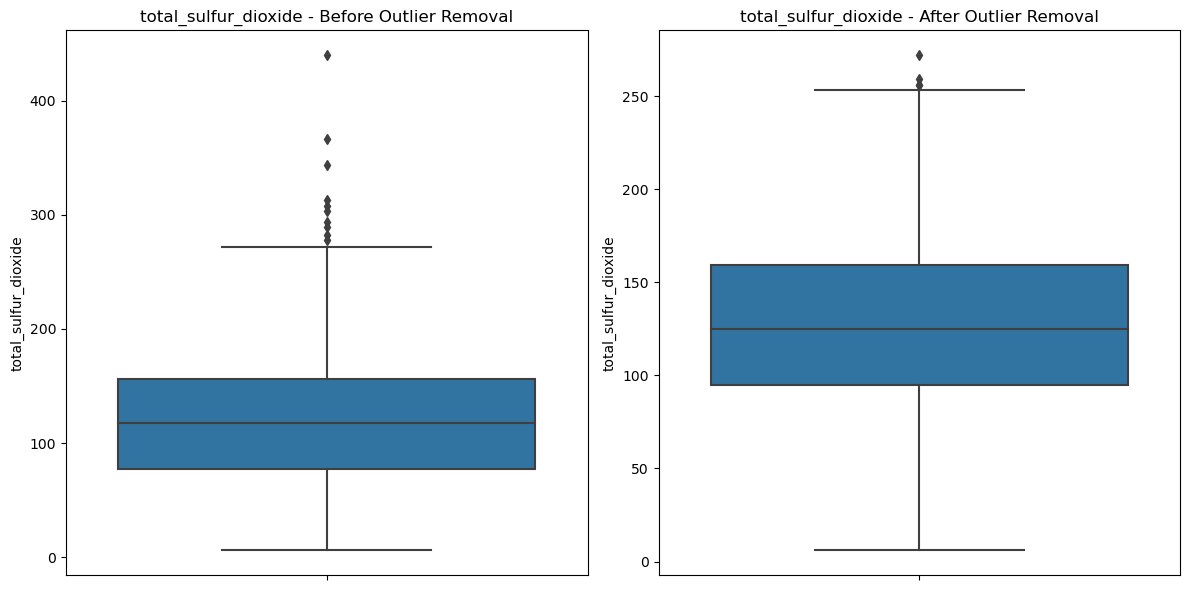

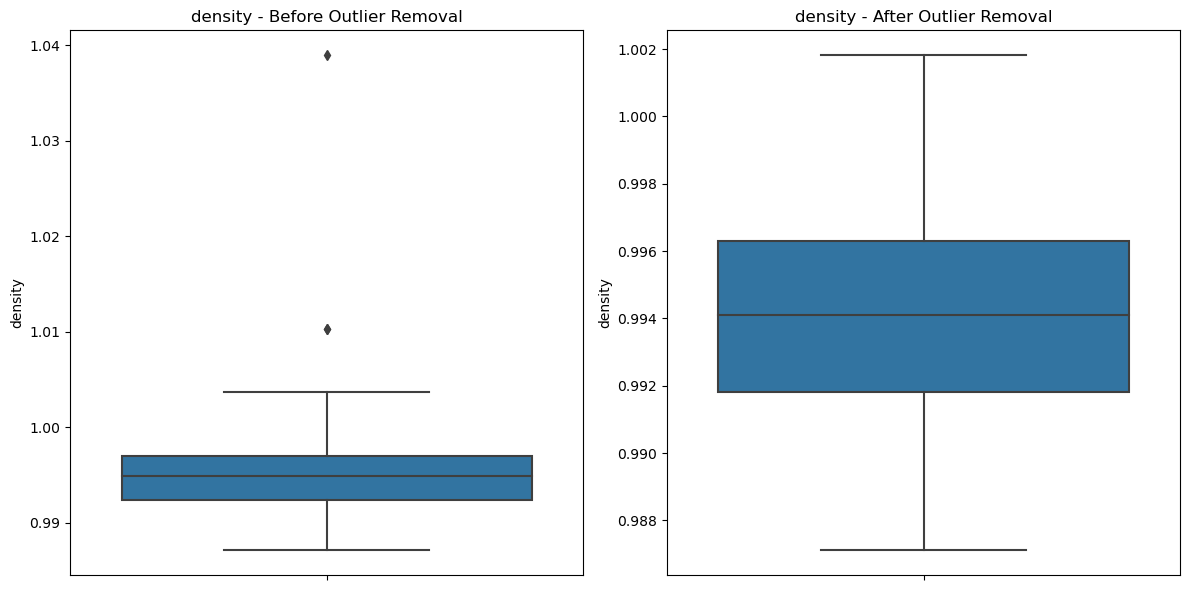

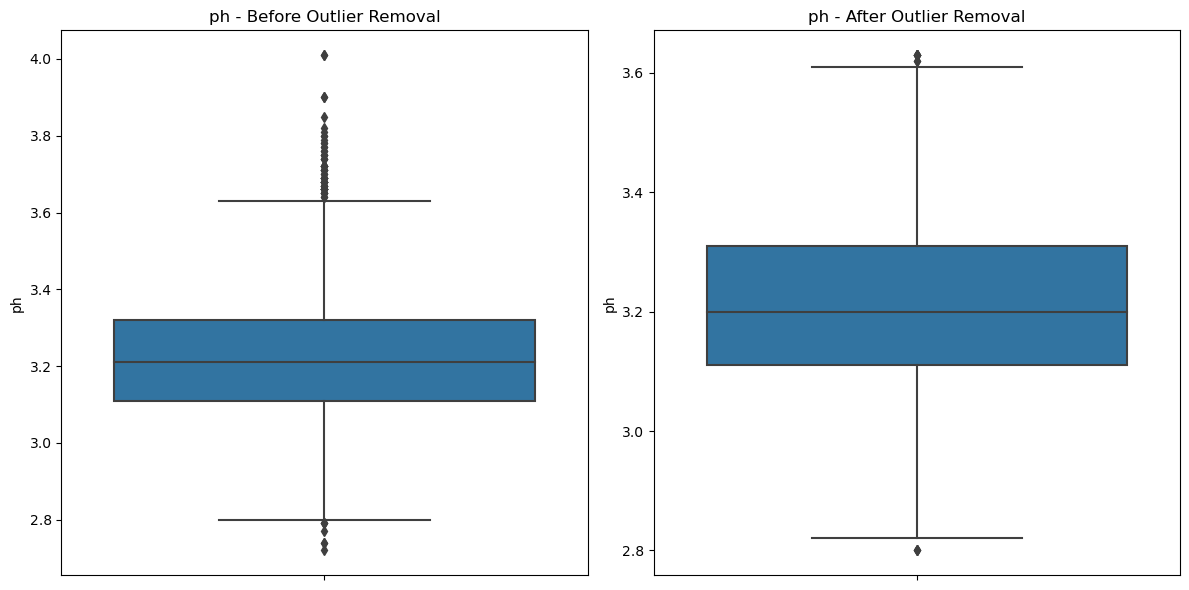

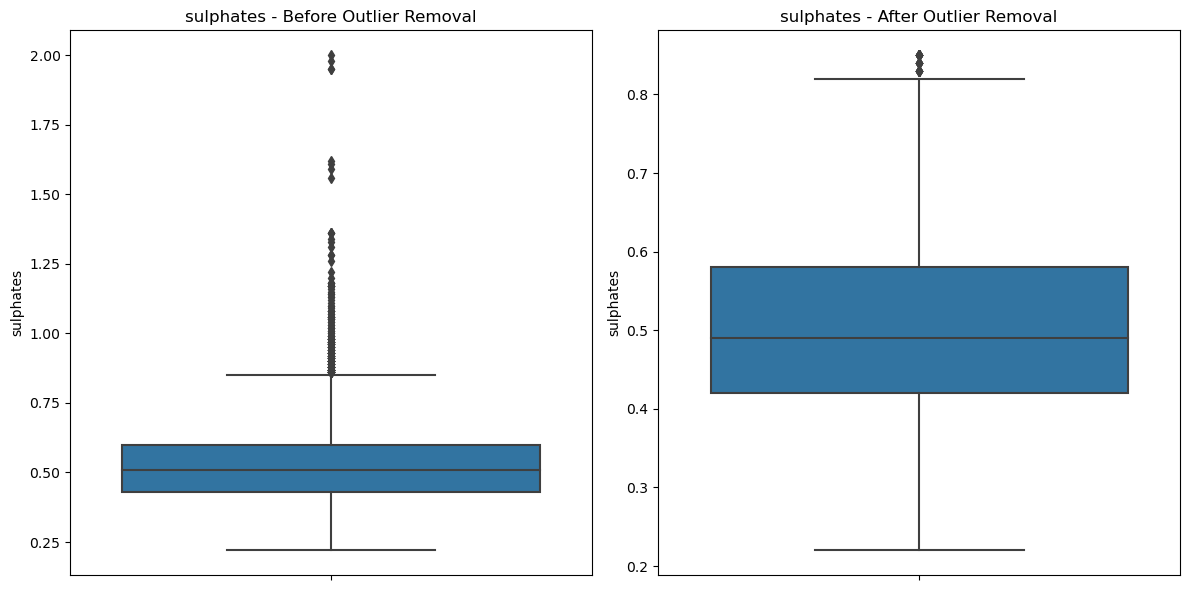

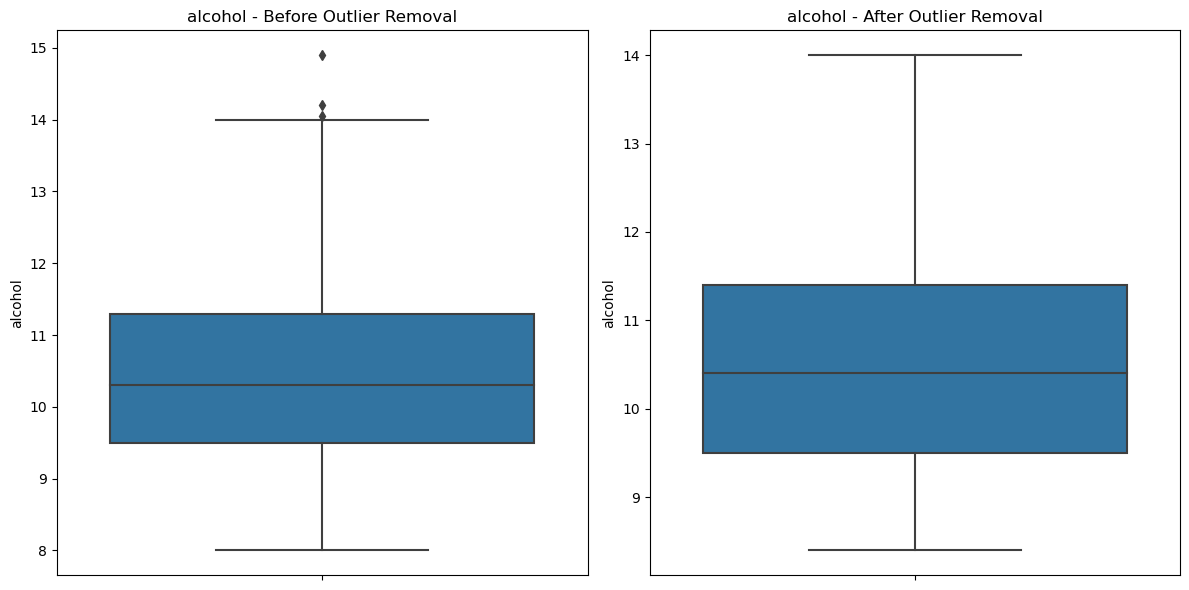

Column  Upper Bound  Lower Bound  Outliers Removed
0          fixed_acidity     9.650000     4.450000               357
1       volatile_acidity     0.655000    -0.025000               377
2            citric_acid     0.600000     0.040000               509
3         residual_sugar    17.550000    -7.650000               118
4              chlorides     0.105500    -0.002500               286
5    free_sulfur_dioxide    77.000000   -19.000000                62
6   total_sulfur_dioxide   274.500000   -41.500000                10
7                density     1.003965     0.985365                 3
8                     ph     3.635000     2.795000                73
9              sulphates     0.855000     0.175000               191
10               alcohol    14.000000     6.800000                 3

In [10]:
# remove outliers
df_clean, summary = w.remove_outliers(df, exclude_columns=['Type', 'quality','White'])
summary

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 1 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null

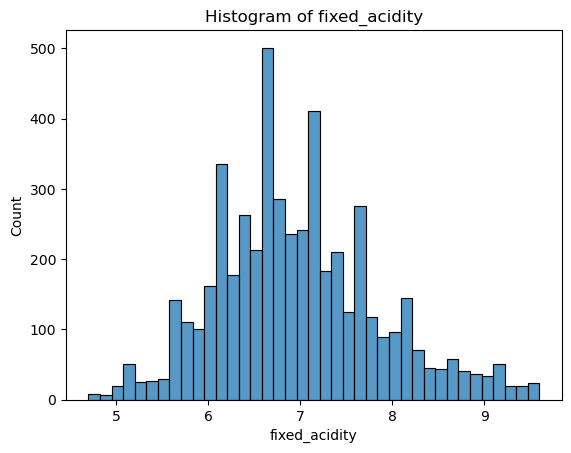

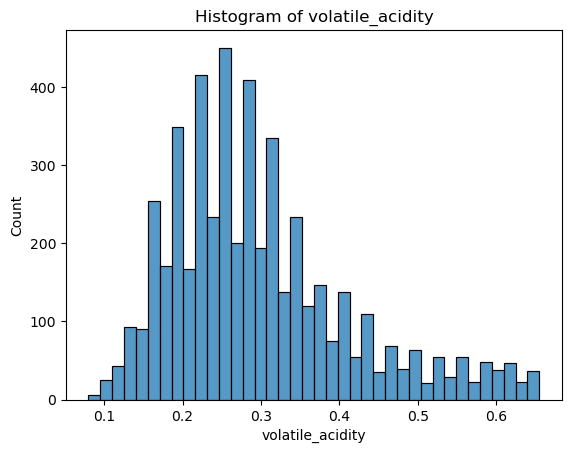

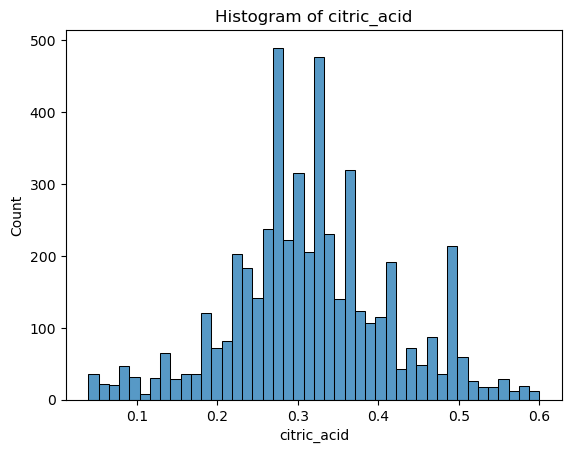

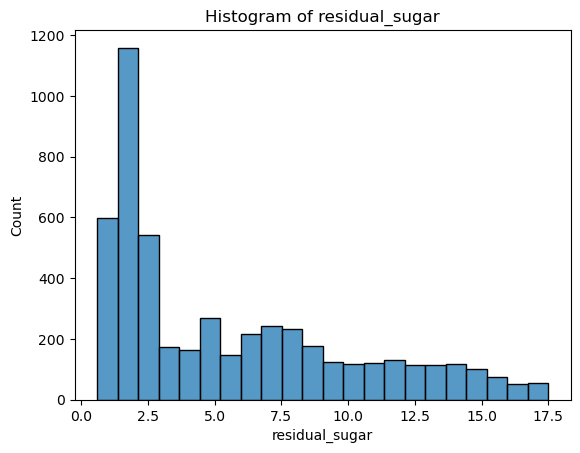

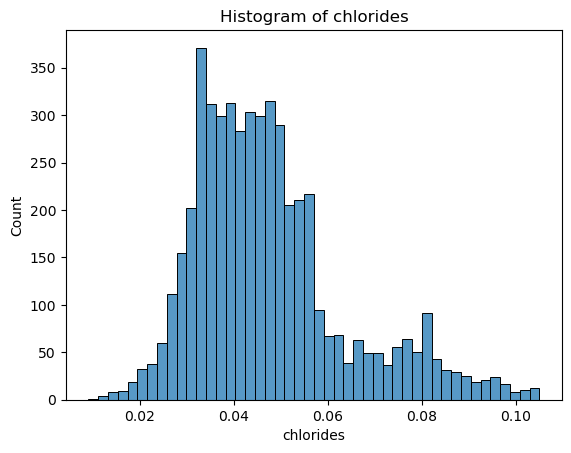

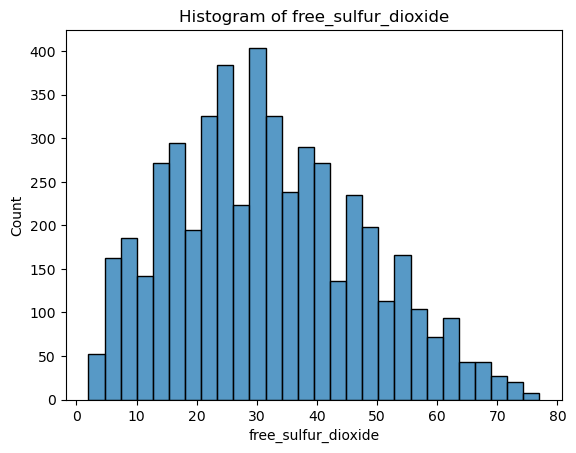

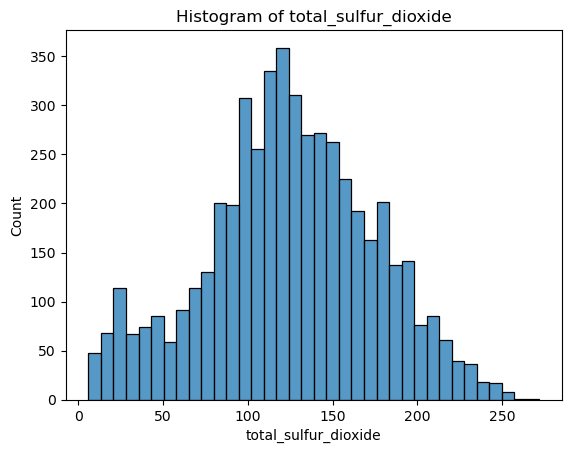

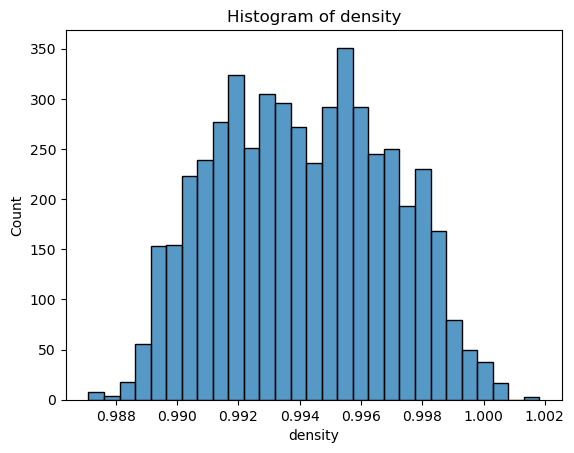

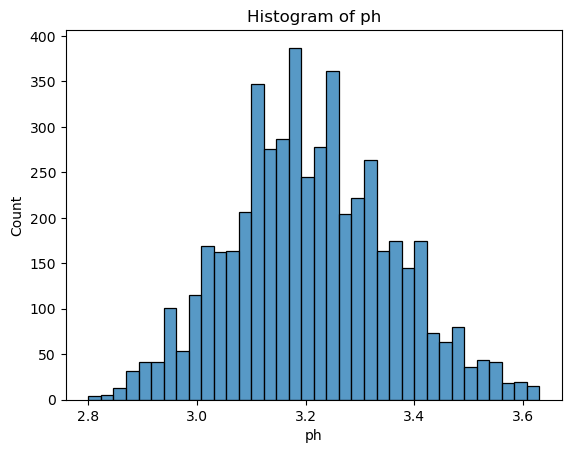

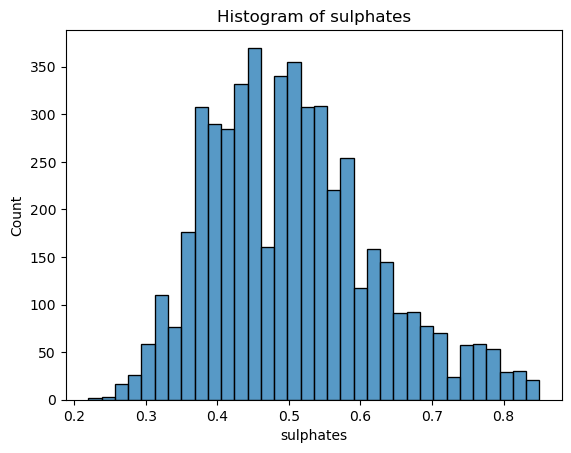

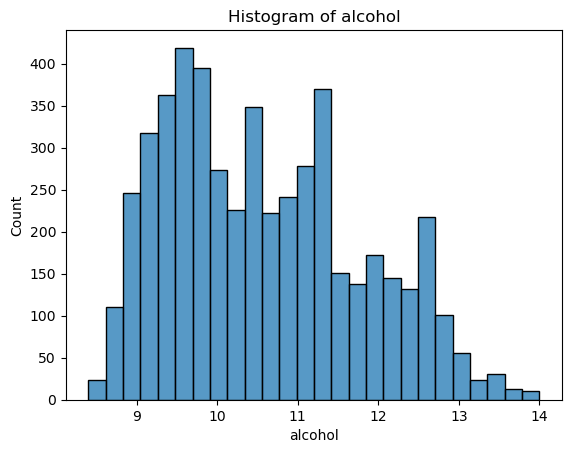

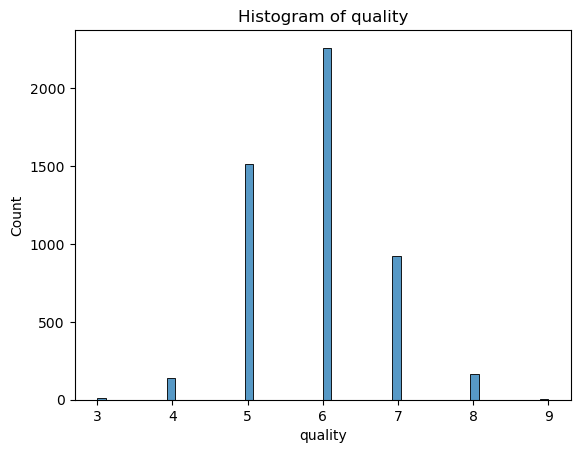

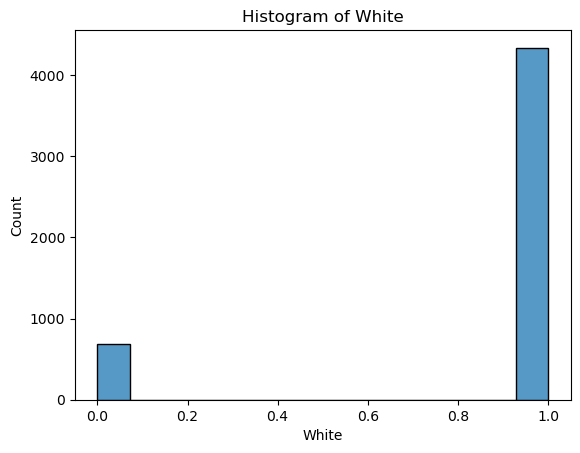

In [11]:
# summarize after outlier removal
# use summarize function
p.summarize2(df_clean)

In [12]:
# rename
df = df_clean

# Explore

In [13]:
#split into train, validate and test
train, validate, test = p.split_data(df)
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
241             7.7              0.31         0.26             7.8      0.031   
4090            6.7              0.24         0.30            10.2      0.070   
3773            5.0              0.61         0.12             1.3      0.009   
2195            6.8              0.25         0.18             1.4      0.056   
910             6.3              0.33         0.20             5.8      0.040   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
241                  23.0                  90.0  0.99440  3.13       0.50   
4090                 44.0                 179.0  0.99666  2.86       0.46   
3773                 65.0                 100.0  0.98740  3.26       0.37   
2195                 13.0                 137.0  0.99350  3.11       0.42   
910                  24.0                 144.0  0.99425  3.15       0.63   

      alcohol  quality   Type  White  
241      10.4        5  White      1  
4090      8.9        6  White      1  
3773     13.5        5  White      1  
2195      9.5        5  White      1  
910       9.9        5  White      1

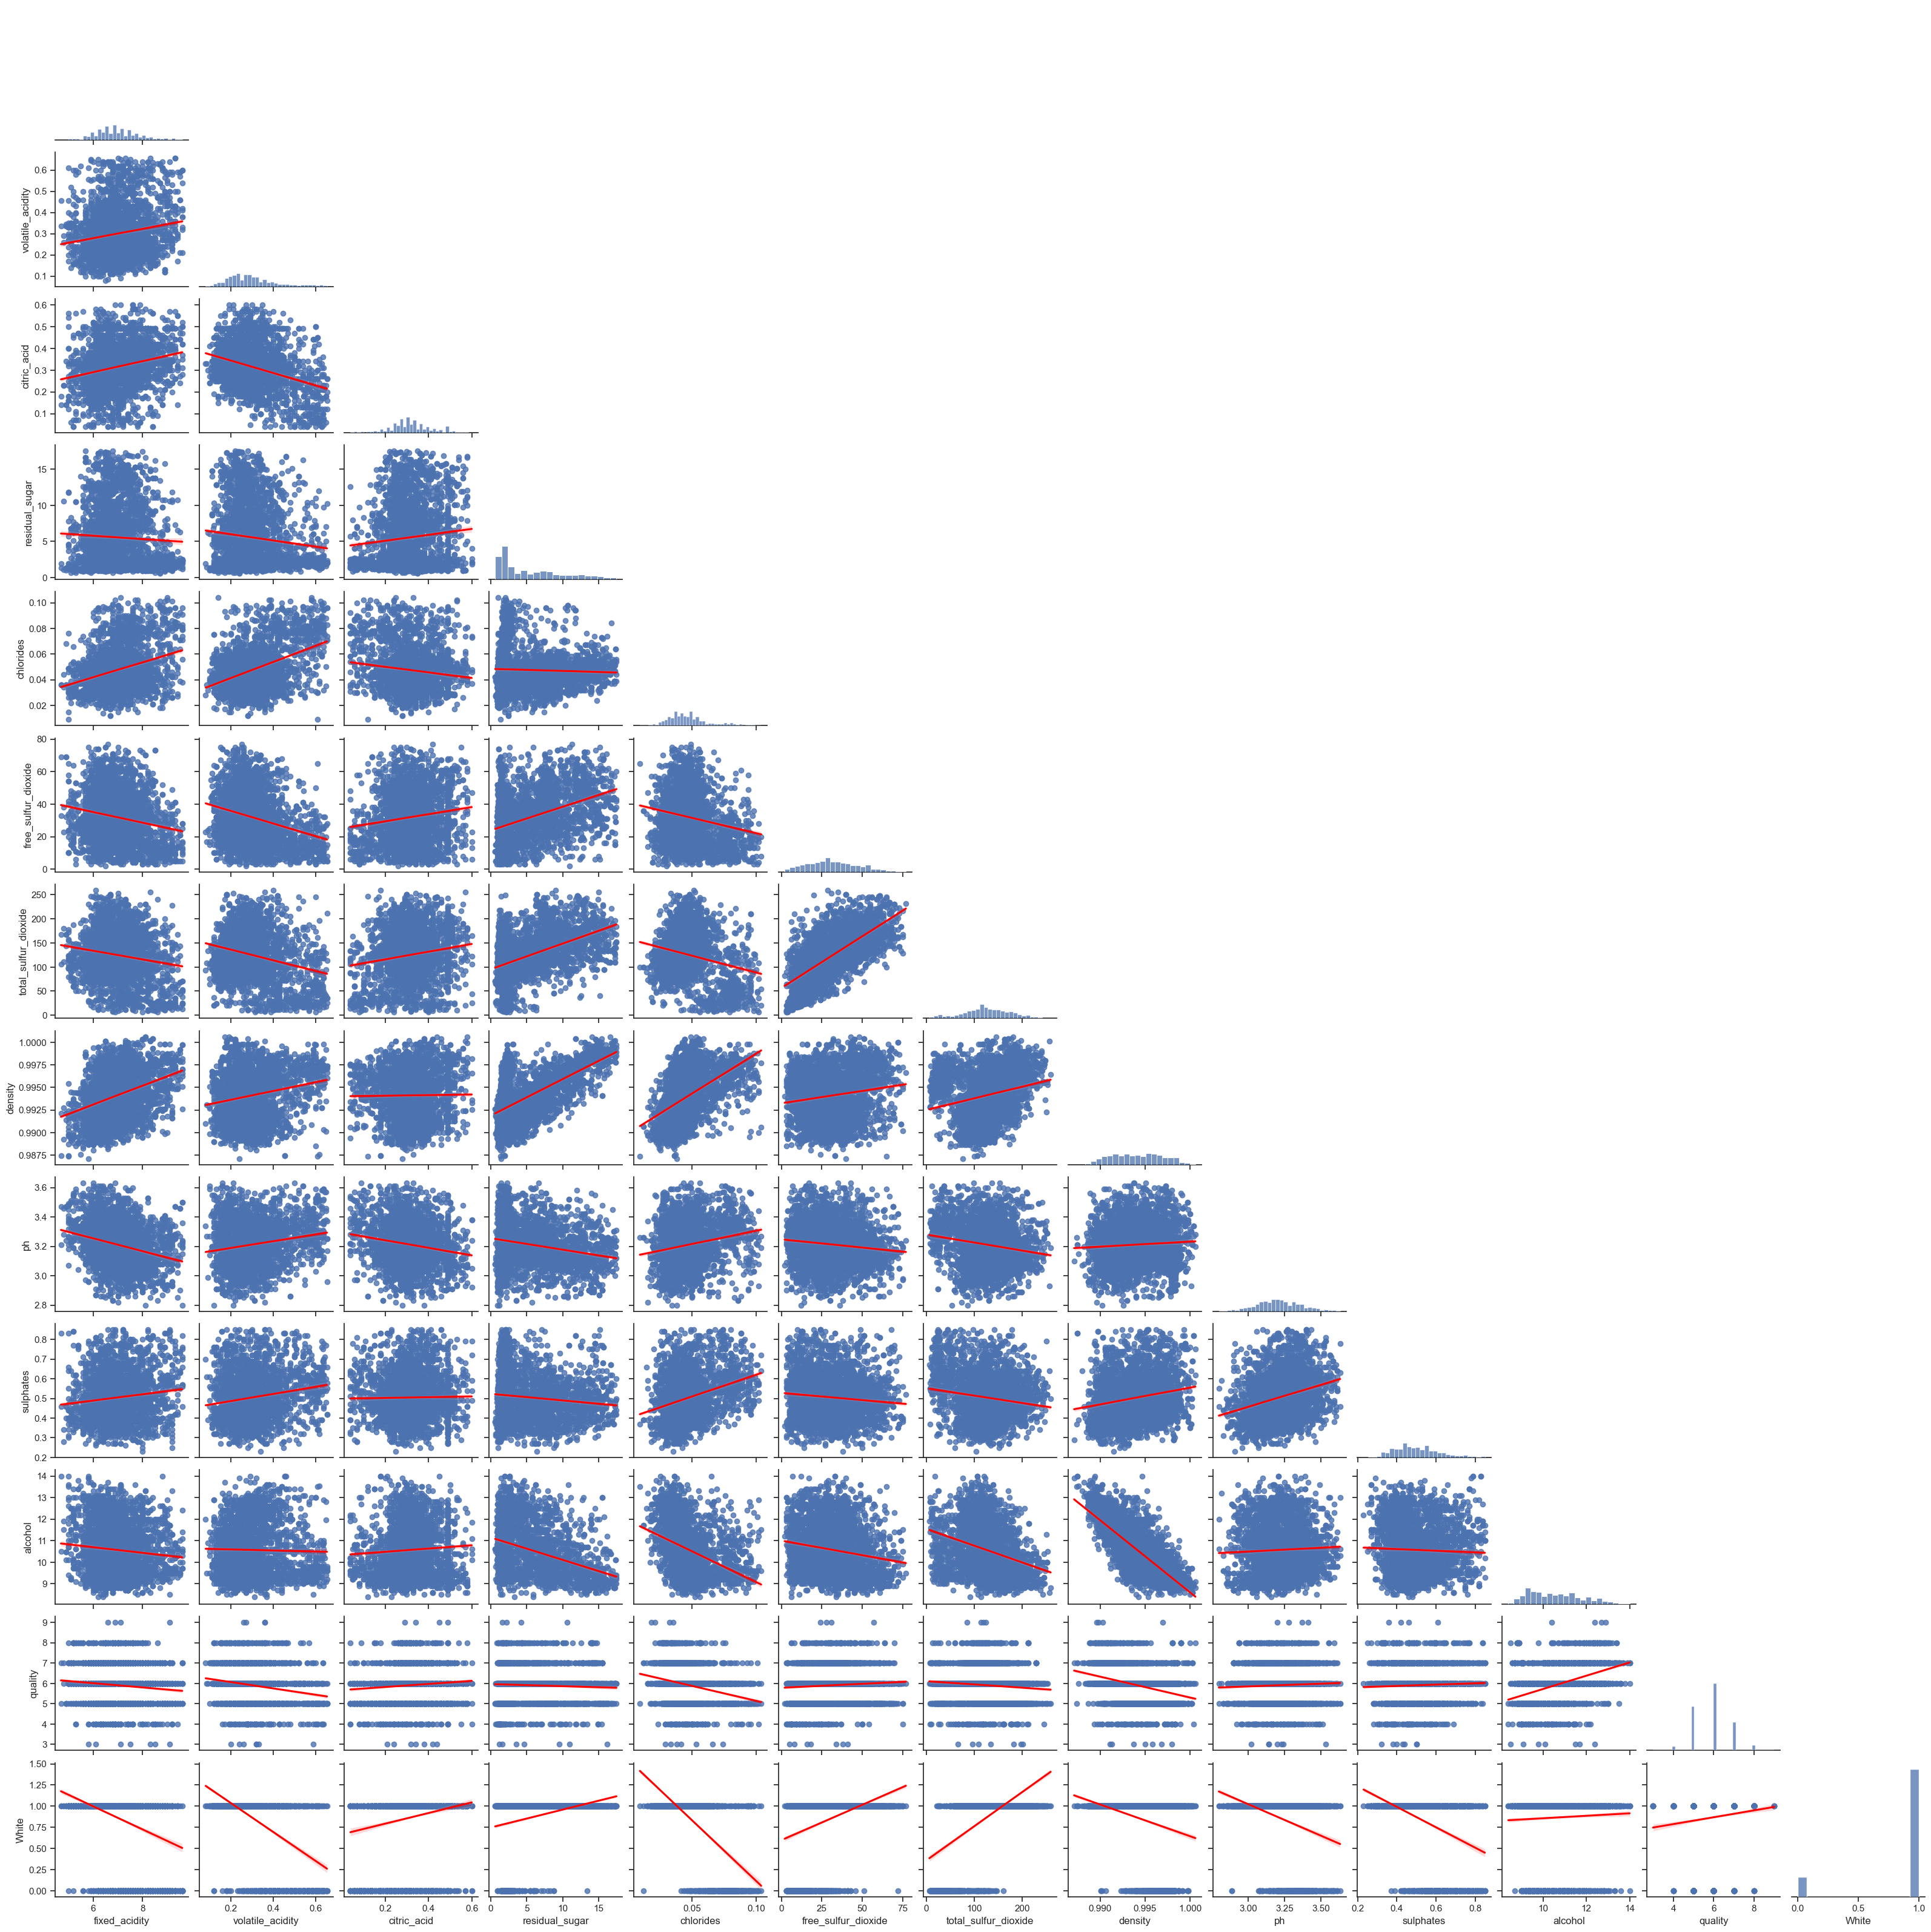

In [14]:
# View pairwise relationships
exp.plot_variable_pairs(train)

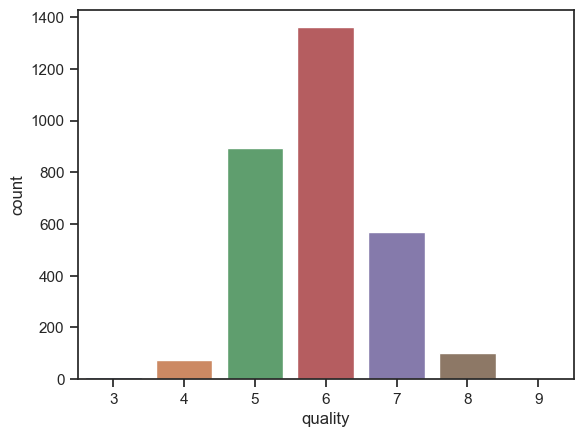

In [15]:
# View Target
sns.countplot(x=train.quality)
plt.show()

- appears to be a normal distribution
- makes sense that the lowest and highest quality ratings have the least amount of wines. exceptional few on both ends of the specturm.



In [16]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
241             7.7              0.31         0.26             7.8      0.031   
4090            6.7              0.24         0.30            10.2      0.070   
3773            5.0              0.61         0.12             1.3      0.009   
2195            6.8              0.25         0.18             1.4      0.056   
910             6.3              0.33         0.20             5.8      0.040   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
241                  23.0                  90.0  0.99440  3.13       0.50   
4090                 44.0                 179.0  0.99666  2.86       0.46   
3773                 65.0                 100.0  0.98740  3.26       0.37   
2195                 13.0                 137.0  0.99350  3.11       0.42   
910                  24.0                 144.0  0.99425  3.15       0.63   

      alcohol  quality   Type  White  
241      10.4        5  White      1  
4090      8.9        6  White      1  
3773     13.5        5  White      1  
2195      9.5        5  White      1  
910       9.9        5  White      1

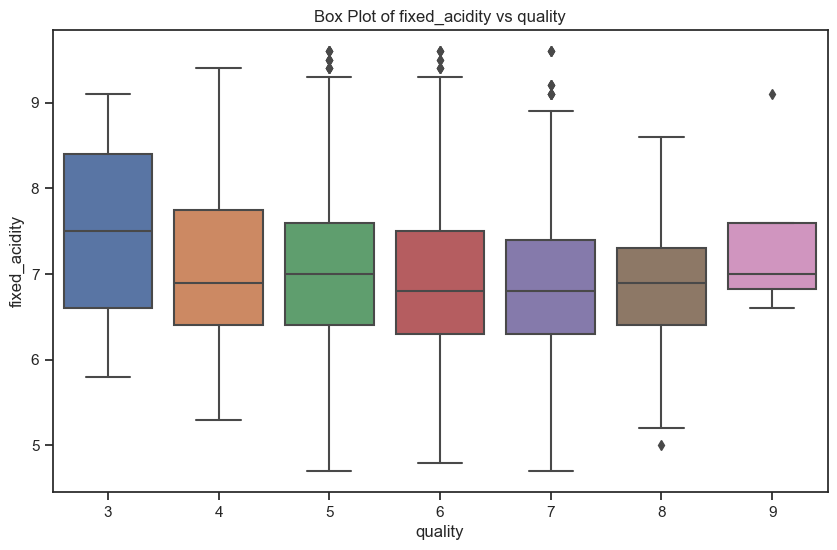

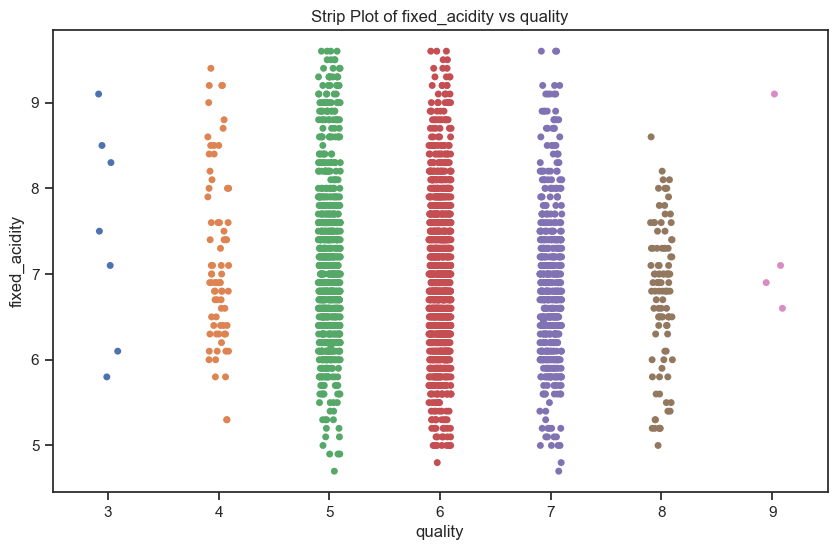

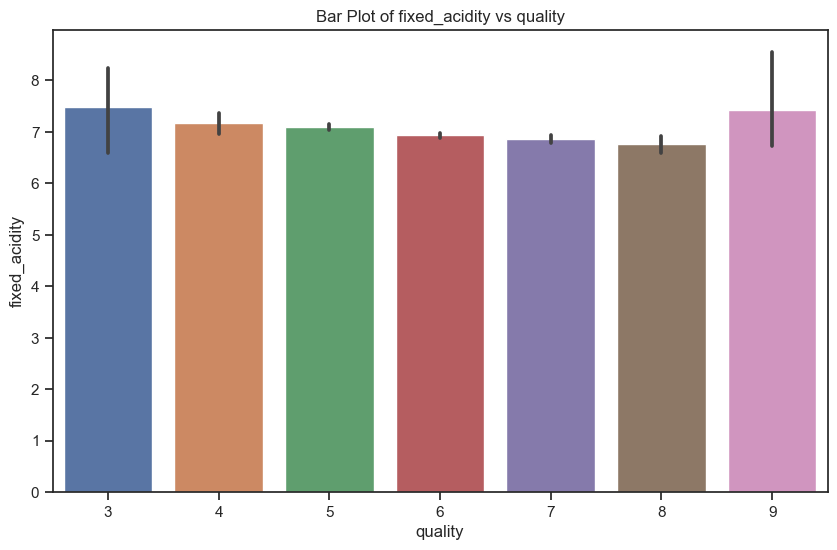

In [17]:
# quality vs. fixed_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality','fixed_acidity')

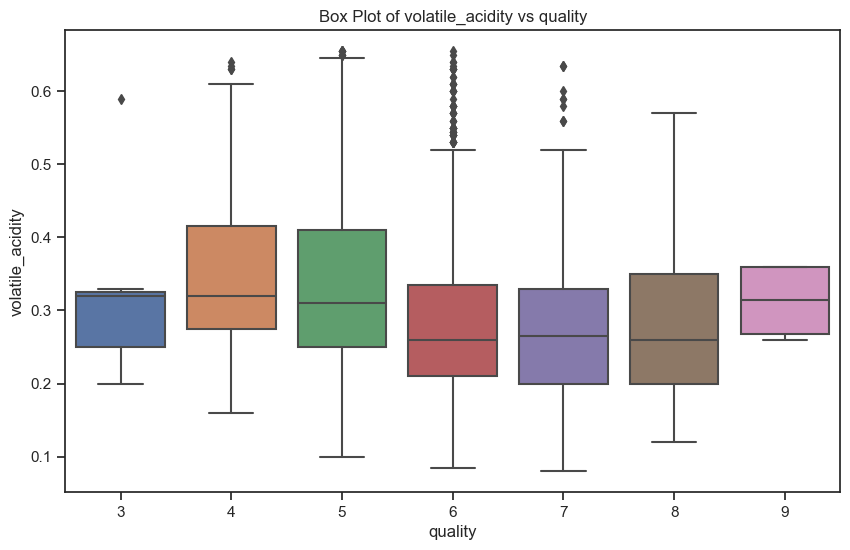

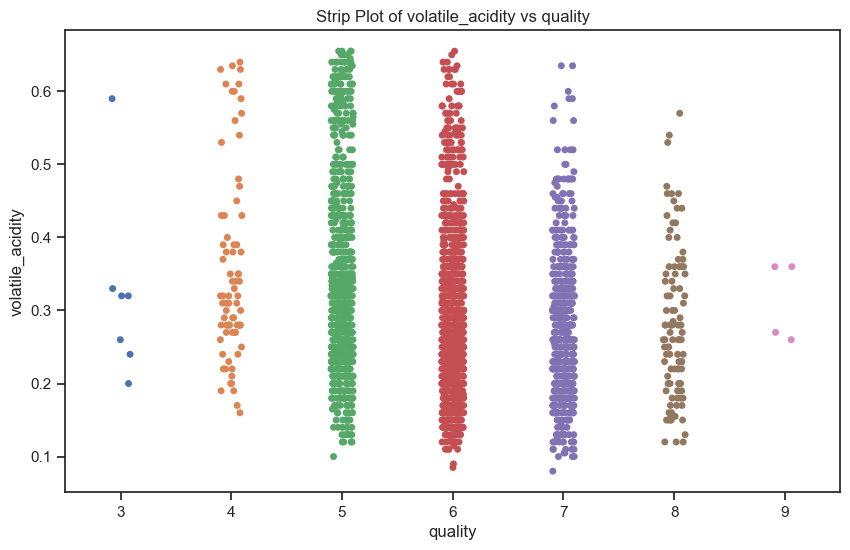

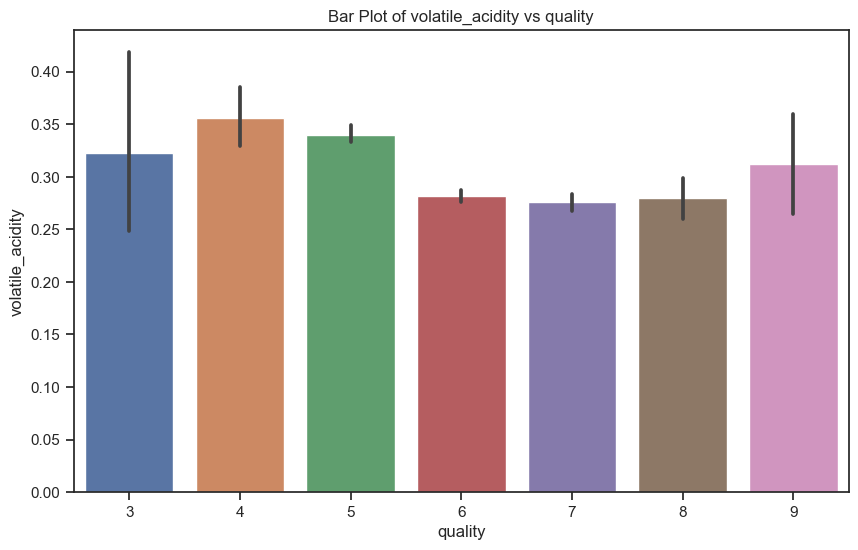

In [18]:
# quality vs. volatile_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality', 'volatile_acidity')

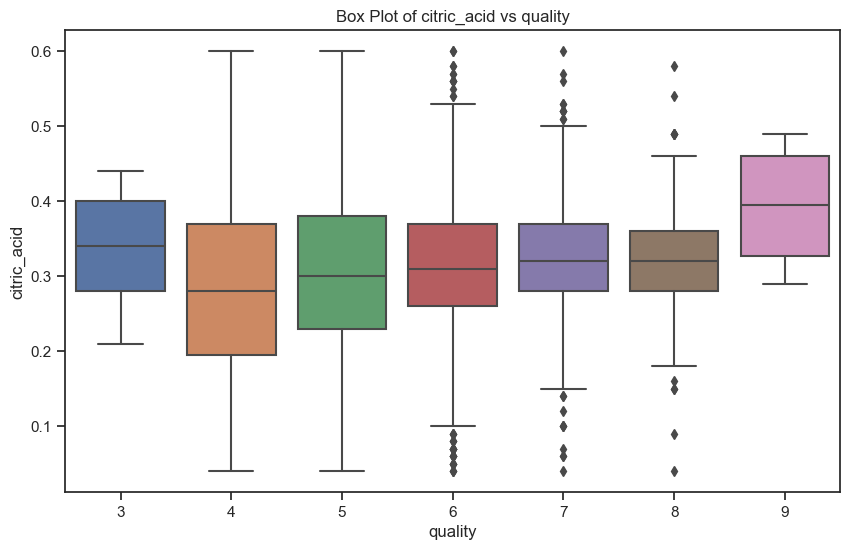

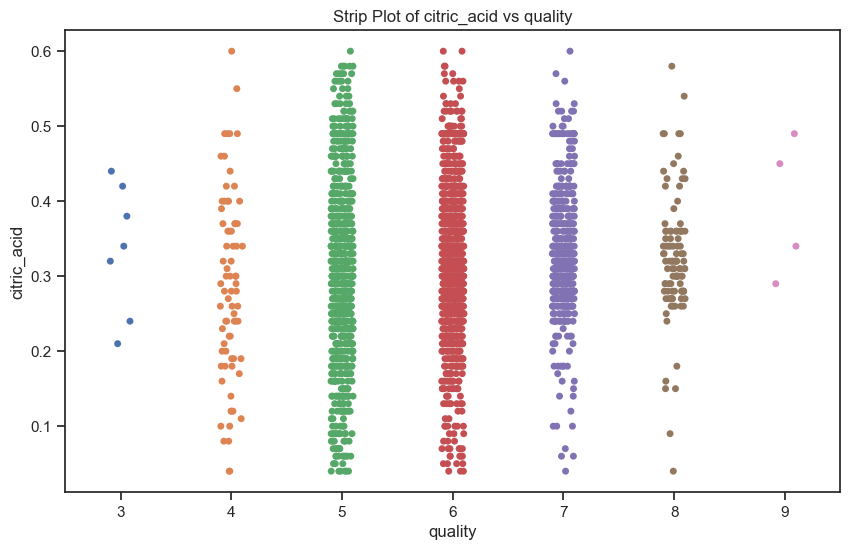

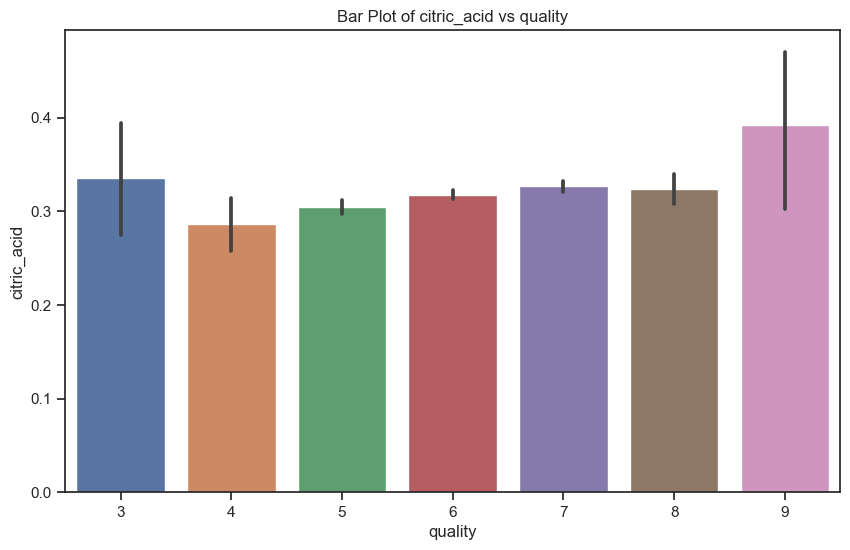

In [19]:
# quality vs. citric_acid
exp.plot_categorical_and_continuous_vars(train, 'quality', 'citric_acid')

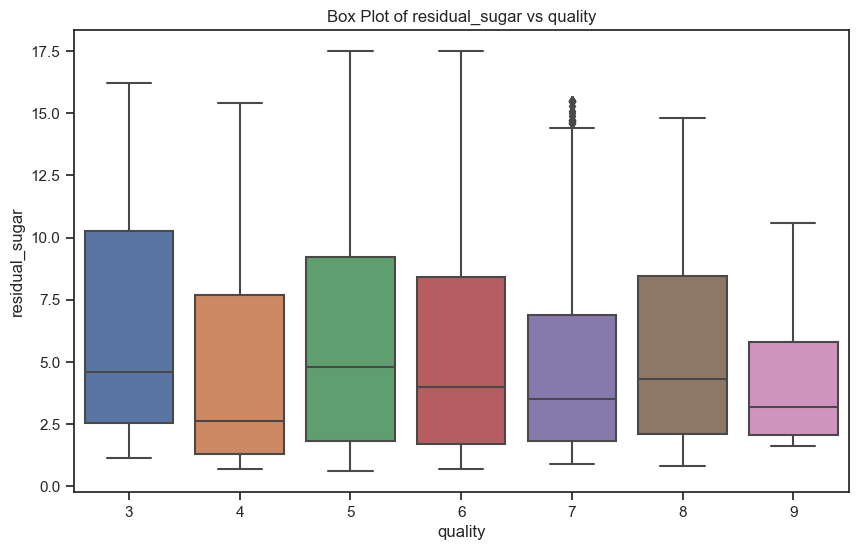

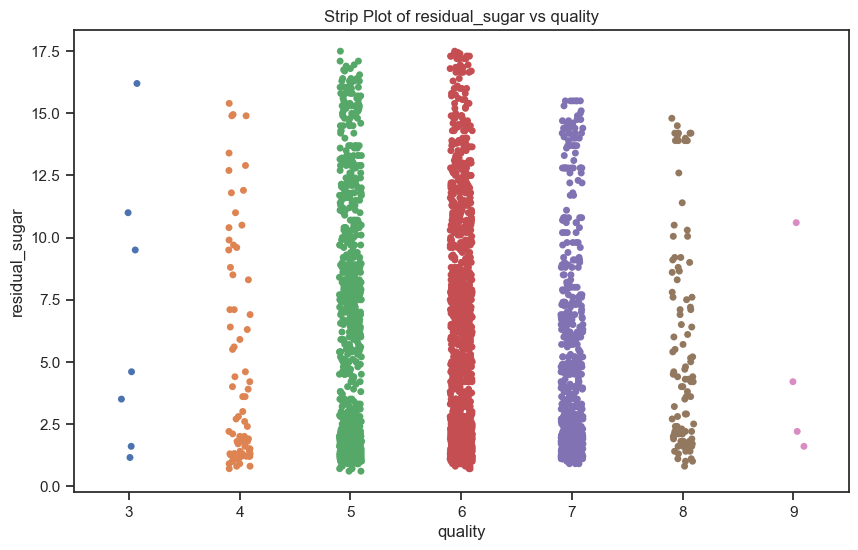

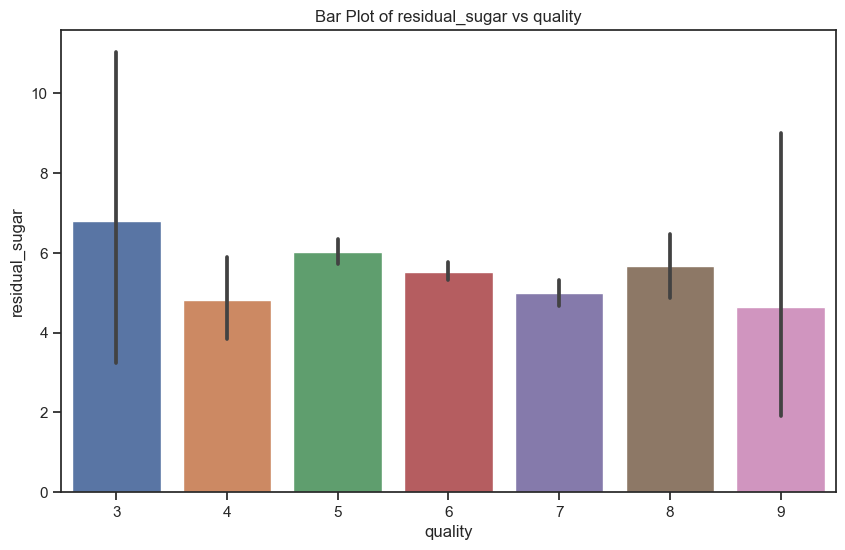

In [20]:
# quality vs. residual_sugar
exp.plot_categorical_and_continuous_vars(train, 'quality', 'residual_sugar')

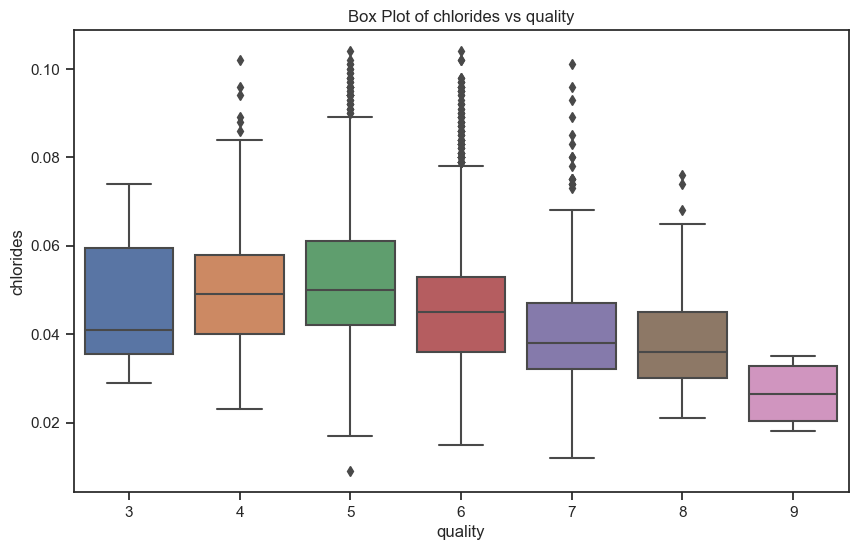

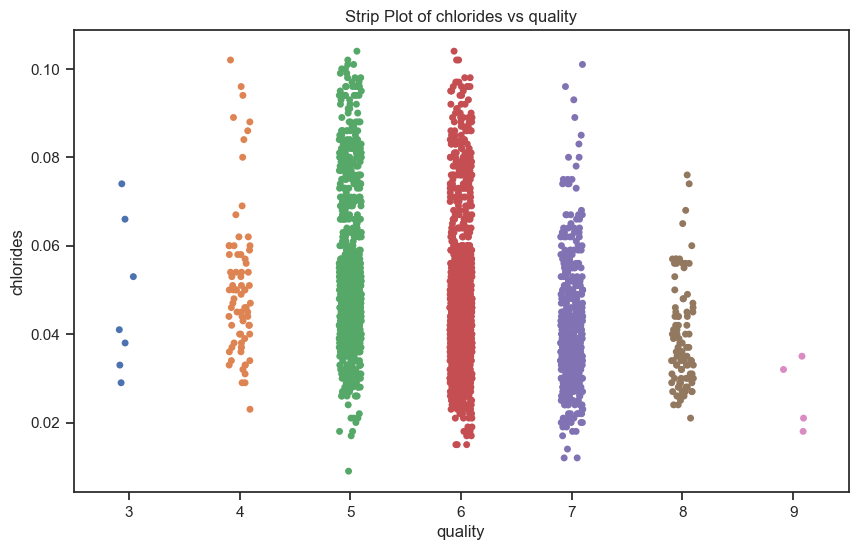

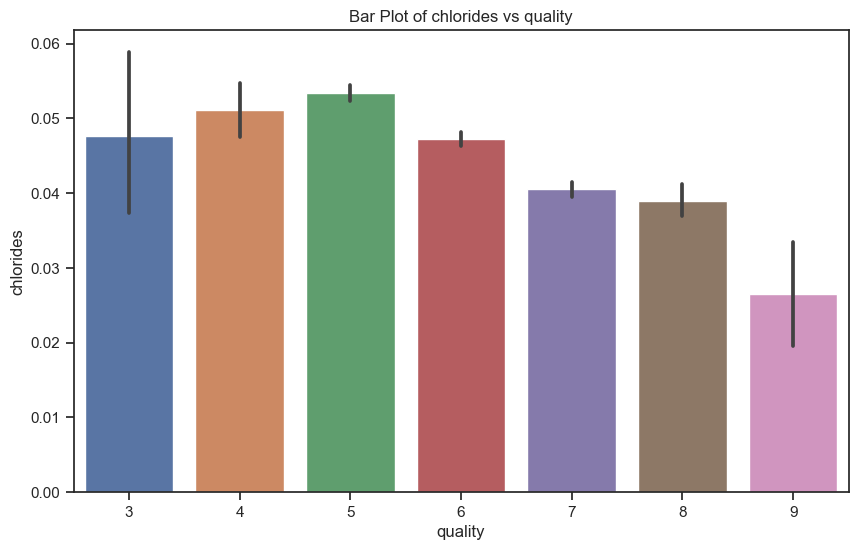

In [21]:
# quality vs. chlorides
exp.plot_categorical_and_continuous_vars(train, 'quality', 'chlorides')

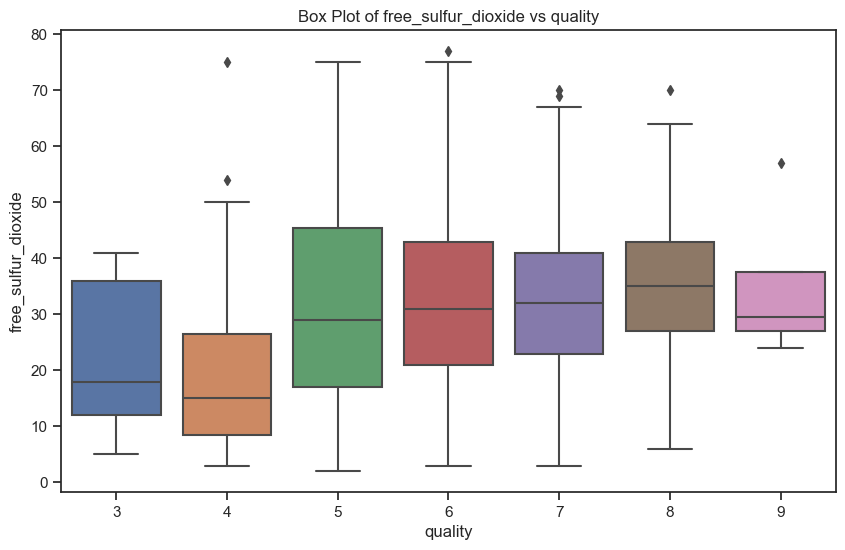

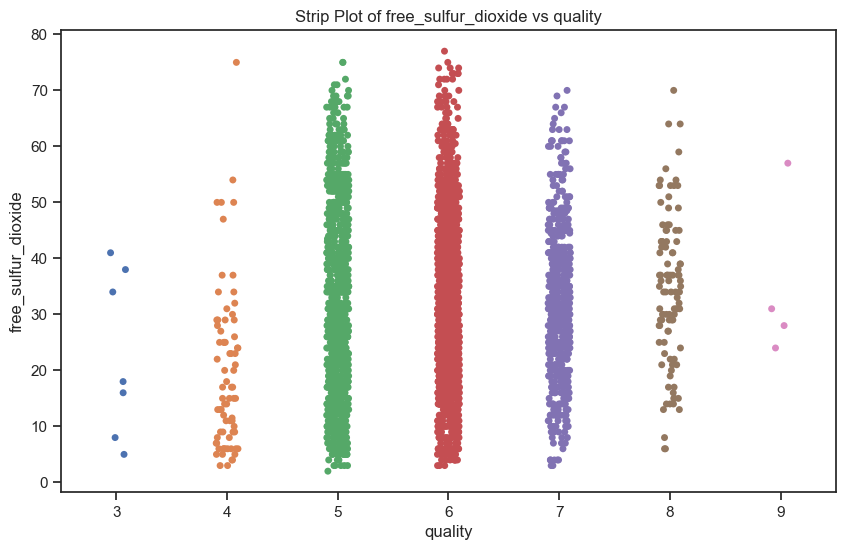

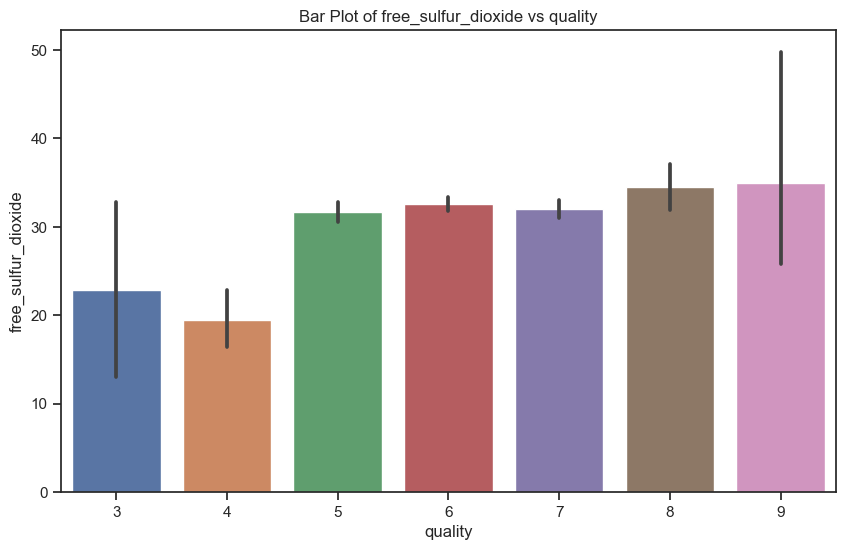

In [22]:
# quality vs. free_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'free_sulfur_dioxide')

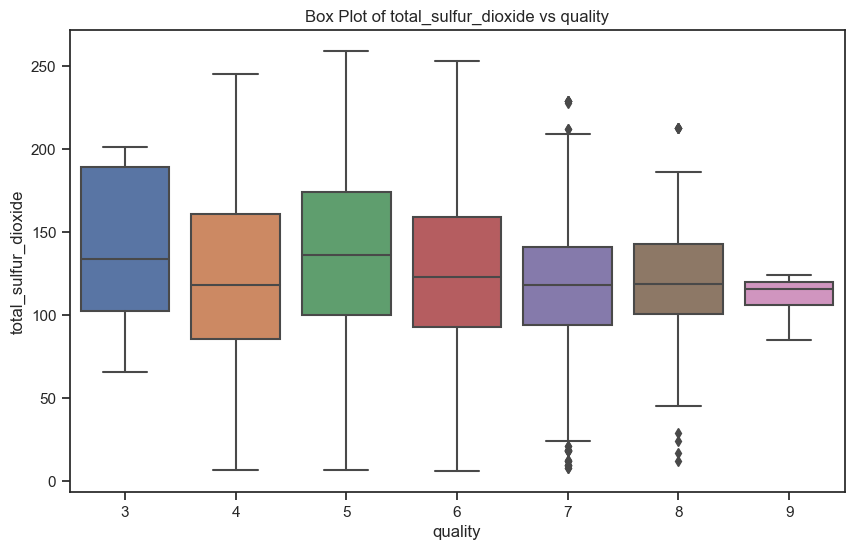

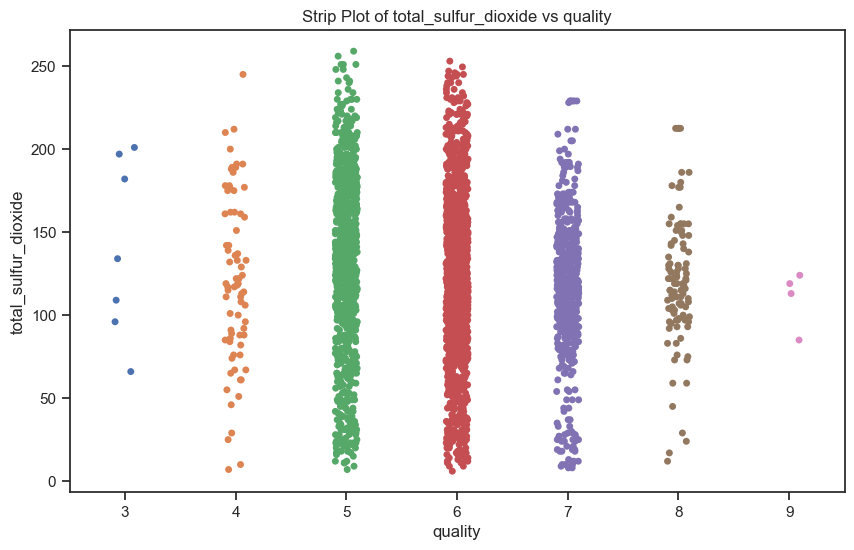

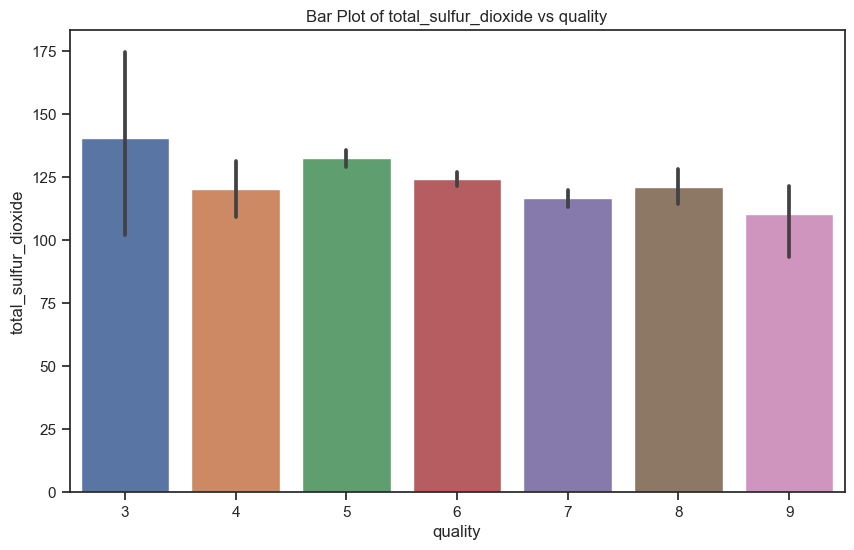

In [23]:
# quality vs. total_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'total_sulfur_dioxide')

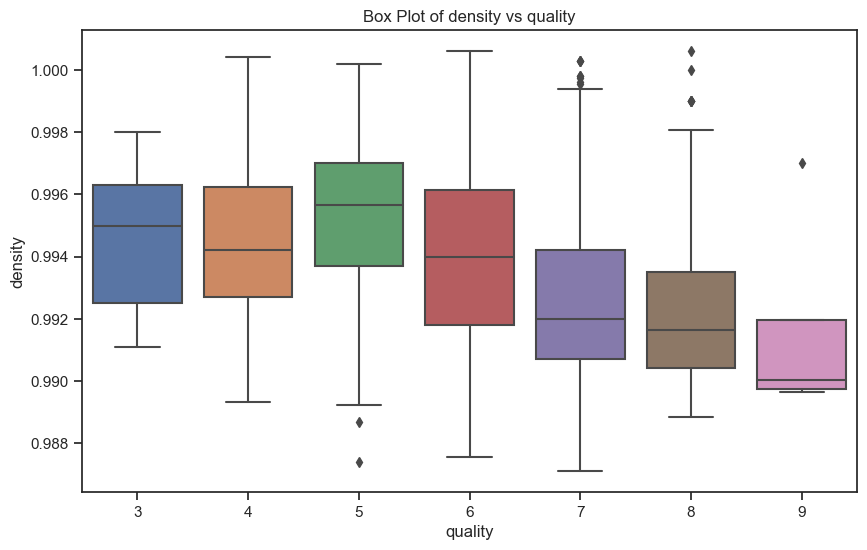

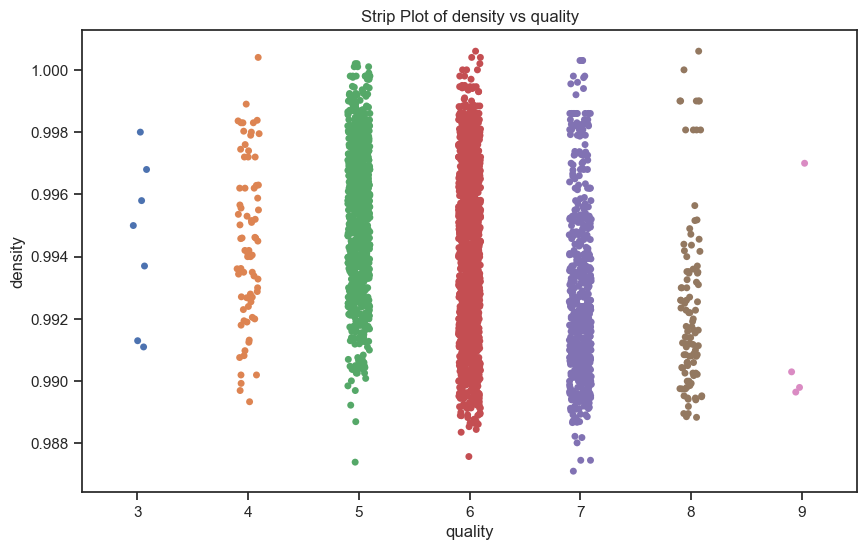

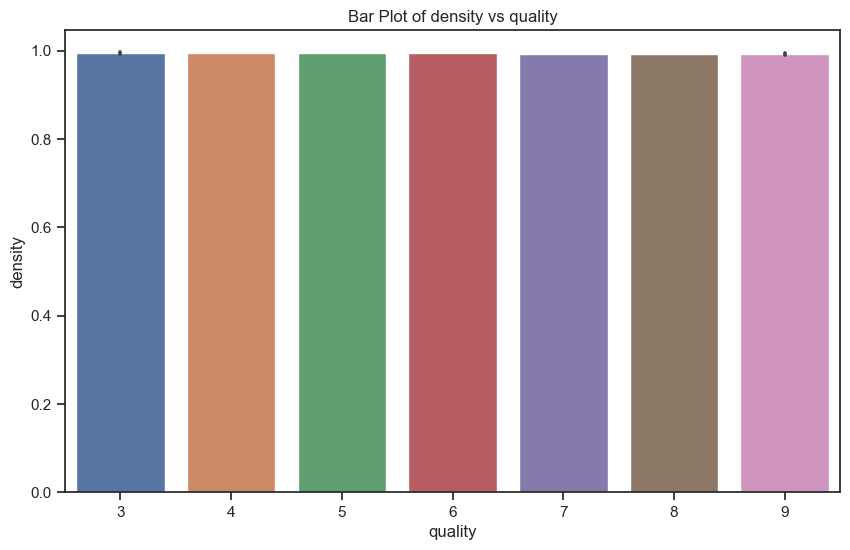

In [24]:
# quality vs. density
exp.plot_categorical_and_continuous_vars(train, 'quality', 'density')

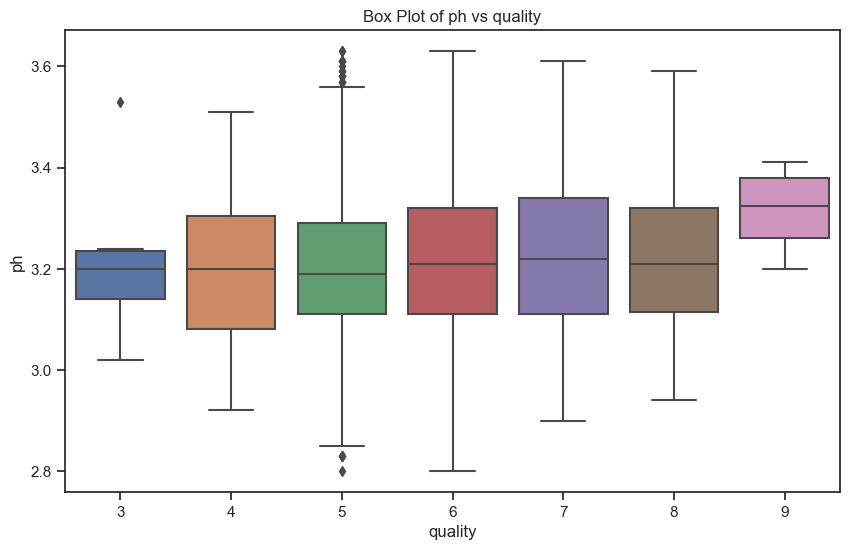

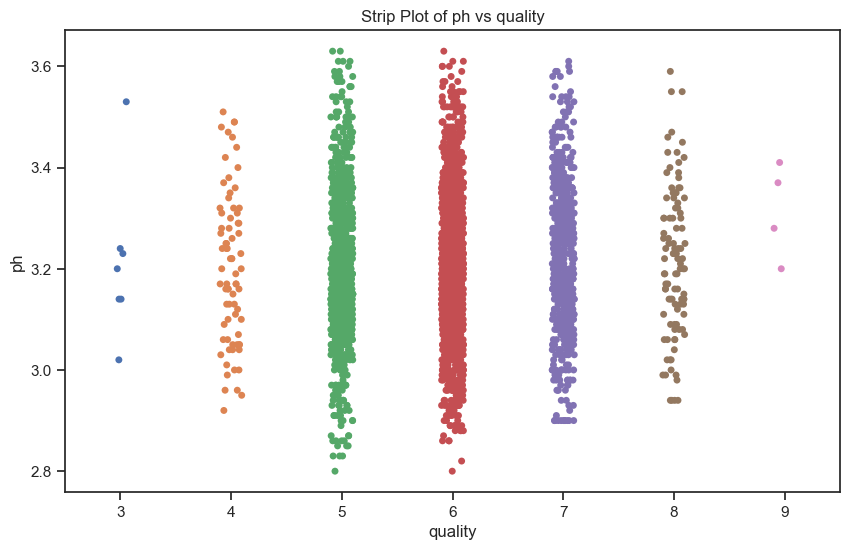

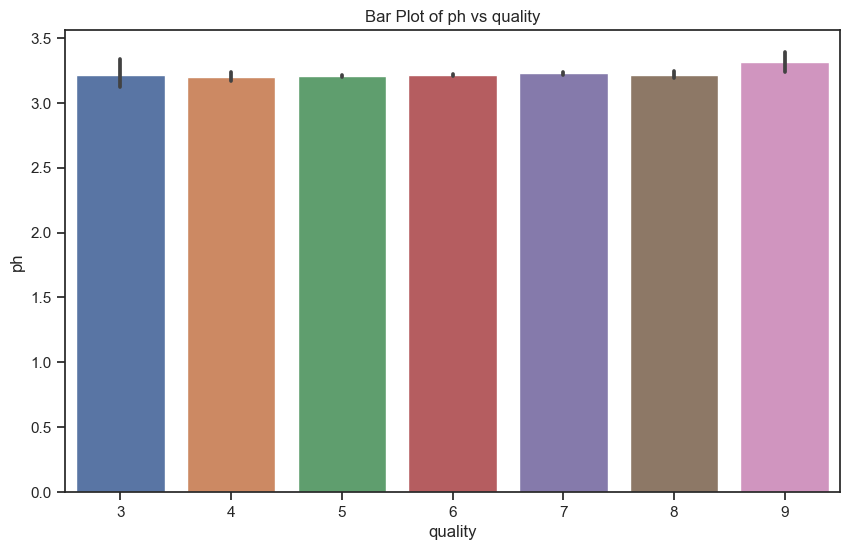

In [25]:
# quality vs. ph
exp.plot_categorical_and_continuous_vars(train, 'quality', 'ph')

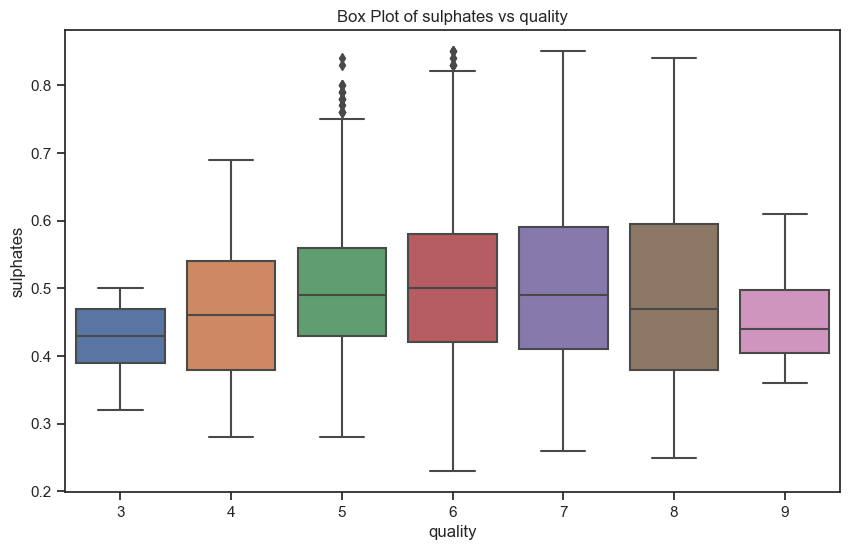

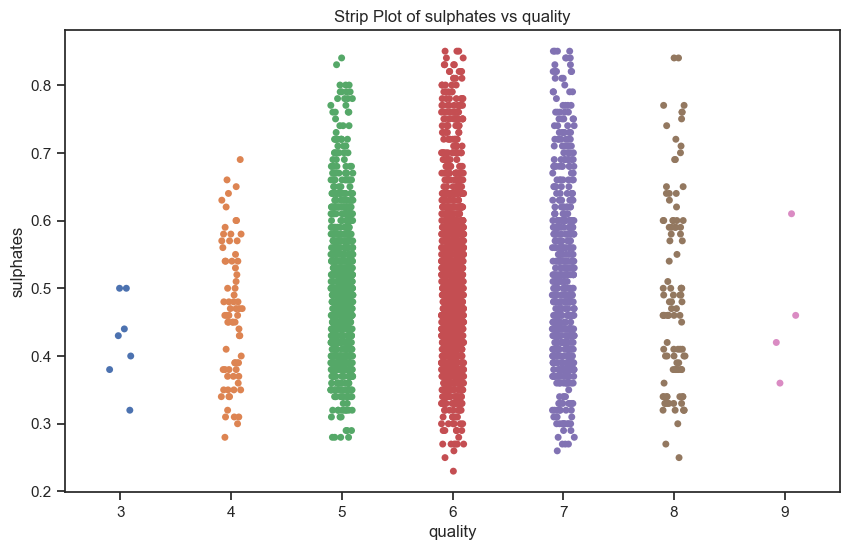

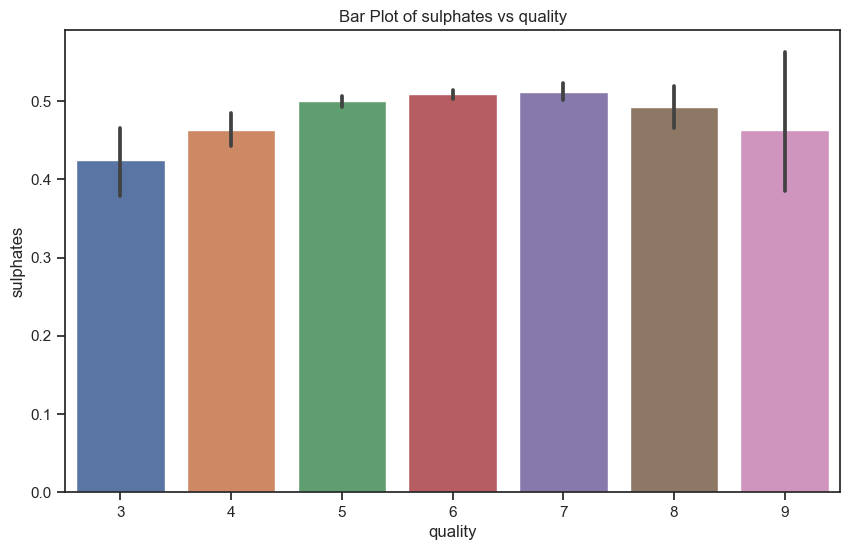

In [26]:
# quality vs. sulphates
exp.plot_categorical_and_continuous_vars(train, 'quality', 'sulphates')

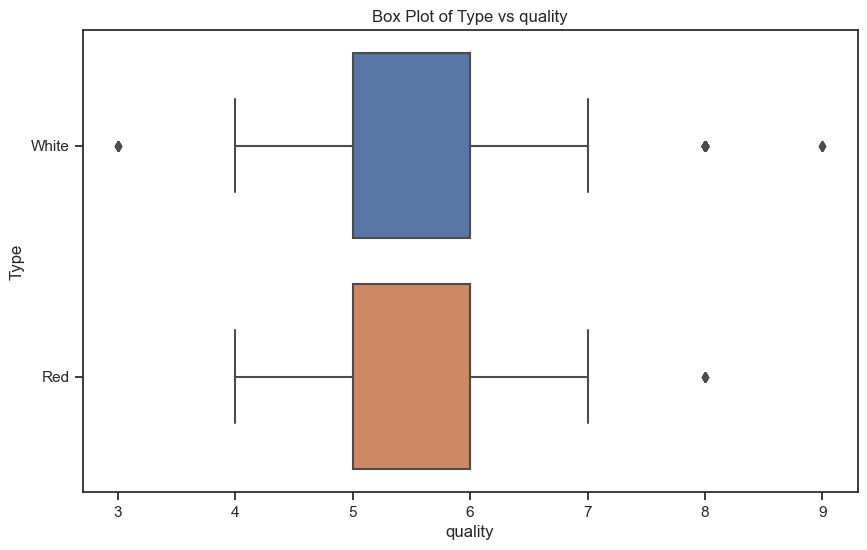

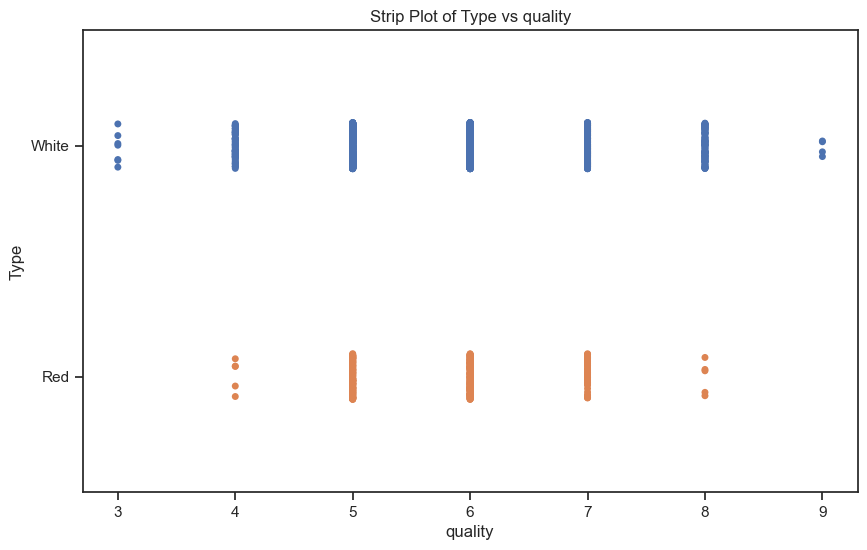

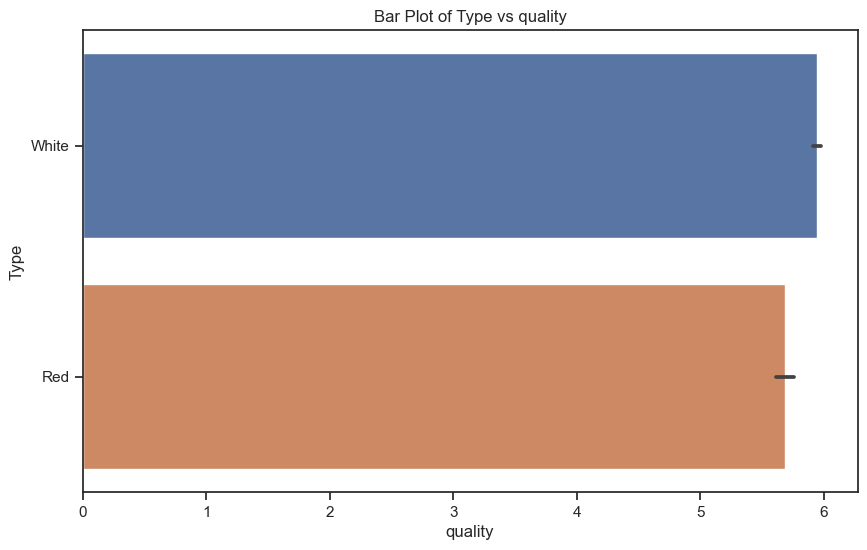

In [27]:
# quality vs. type
exp.plot_categorical_and_continuous_vars(train, 'quality', 'Type')

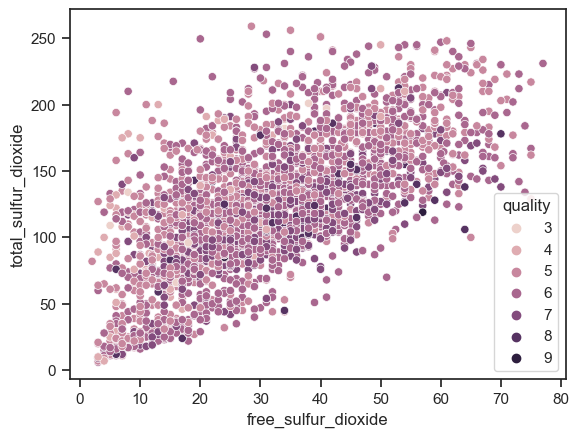

In [28]:
# examine the two sulfur dioxides, total is a derivative of free. Total represents free and total. 
# *** Recommend -- Drop the free column
sns.scatterplot(data=train, x= 'free_sulfur_dioxide', y= 'total_sulfur_dioxide', hue='quality')
plt.show()

In [29]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
241             7.7              0.31         0.26             7.8      0.031   
4090            6.7              0.24         0.30            10.2      0.070   
3773            5.0              0.61         0.12             1.3      0.009   
2195            6.8              0.25         0.18             1.4      0.056   
910             6.3              0.33         0.20             5.8      0.040   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
241                  23.0                  90.0  0.99440  3.13       0.50   
4090                 44.0                 179.0  0.99666  2.86       0.46   
3773                 65.0                 100.0  0.98740  3.26       0.37   
2195                 13.0                 137.0  0.99350  3.11       0.42   
910                  24.0                 144.0  0.99425  3.15       0.63   

      alcohol  quality   Type  White  
241      10.4        5  White      1  
4090      8.9        6  White      1  
3773     13.5        5  White      1  
2195      9.5        5  White      1  
910       9.9        5  White      1

#### cluster for new features
